# Diabetes-Prediction



*Life is not over because you have diabetes. Make the most of what you have, be grateful.*                                                                           —Dale Evans

Pima Indians residing in Arizona were known for their healthy diet and active lifestyle. In early 19th century, presence of diabetes among Pima was equivalent to that of the general U.S. population. But as the mingling with outside settlers increased, in addition to devastating famines, their traditional diet changed from healthy to manufactured and processed foods and their jobs became less physically challenging. A nice description of history of Pima Indians and prevalence of diabetes is in the following video.

This timing of lifestyle and livelihood changes coincided with an accelerated occurrence of diabetes in Pima Indians. By 1950, the prevalence of diabetes among the Pima increased ten-fold. In this notebook we would like to explore data collected on Pima Indians by the National Institute of Diabetes to gain some insights behind the features related with diabetes. These insights will be highly valuable to predict diabetes by machine learning.

[![Diabetes in Pima Indians](http://img.youtube.com/vi/pN4HqWRybwk/0.jpg)](http://www.youtube.com/watch?v=pN4HqWRybwk) 

# Contents of the Notebook:

# [1. Exploratory Data Analysis (EDA)](#load)
   [A. Import libraries and load data](#loada)<br/>
   [B. Load data dictionary](#loadb)<br/>
   [C. Explore target variable](#loadc)<br/>
   [D. Analysis of individual features](#loadd)<br/>
   [E. Decipher insightful trends between multiple features](#loade)<br/>

# [2. Feature engineering and Data cleaning](#derived) 
   [A. Outlier detection](#derivedA) <br/>
   [B. Converting String Values into Numeric](#derivedB) <br/>
   [C. Converting features into suitable form for modeling](#derivedC) <br/>  
    
    
# [3. Predictive modeling](#mode) 
   [A. Running Basic Algorithms](#modeA) <br/>
   [B. StandardScalar](#modeB) <br/>
   [C. Cross Validation](#modeC) <br/>
   [D. Confusion Matrix](#modeD) <br/>
   [E. Hyper-parameters tuning](#modeE) <br/>
   [F. Ensembling](#modeF) <br/>
   [G. Most important features](#modeG) <br/>

<a id='load'><a/>
# **1. Exploratory Data Analysis (EDA)**

<a id='loada'><a/>
## **1.A. Import libraries and load data**

In [2]:
import numpy as np
import pandas as pd
import pandas_profiling as pf
from collections import Counter

# VisualiZation
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Configure visualisations
%matplotlib inline
plt.style.use('ggplot')

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

<a id='loadb'><a/>
## **1.B. Load data dictionary**

We can have basic information of the columns and about data overall, stored in the form of a dictionary.

In [3]:
pd.options.display.max_colwidth = 130
pima_dictionary = pd.read_excel('pima_dictionary.xlsx', index_col='Column Name')
pima_dictionary

Description
Column Name                                                                                                                          
pregnant                                                                       number of times the woman got pregnant during her life
glucose                                   it represents the plasma glucose concentration at 2 hours in an oral glucose tolerance test
diastolic                                                                       diastolic blood pressure  measures heath of the heart
triceps                                                                                               value used to estimate body fat
insulin                                                             it represents the rate of insulin 2 hours serum insulin (mu U/ml)
bmi          represents the Body Mass Index (weight in kg / (height in meters squared), and is an indicator of the health of a person
diabetes                                                                      it is an indicator of history of diabetes in the family
age                                                                                                  age in years of the Pima’s woman
test                           can take only 2 values (‘negatif’ or ‘positif’) and represents if the patient shows signs of diabetes.

In [4]:
pima = pd.read_csv('PimaIndians.csv') 
pima.head(2)

pregnant  glucose  diastolic  triceps  insulin   bmi  diabetes  age  \
0         1       89         66       23       94  28.1     0.167   21   
1         0      137         40       35      168  43.1     2.288   33   

      test  
0  negatif  
1  positif

In [5]:
#checking for total null values
pima.isna().sum() 

pregnant     0
glucose      0
diastolic    0
triceps      0
insulin      0
bmi          0
diabetes     0
age          0
test         0
dtype: int64

♦ **Initial observation:** 

1. Data do not contain any missing values. 


2. Based on Turley's research, as in this data every observation is a row and every column is a variable, we can say data is tidy.

As data set is found to be tidy, we can find the data types of each column. Sometimes an actual numeric column is determined by pandas to be a string (object) column due to presence of one or more strings in a column. But, in this dataset that doesn't appear to be the case.

In [6]:
pima.dtypes

pregnant       int64
glucose        int64
diastolic      int64
triceps        int64
insulin        int64
bmi          float64
diabetes     float64
age            int64
test          object
dtype: object

In [7]:
# update data dictionary
pima_dictionary2 = pima_dictionary.copy()
pima_dictionary2['Data Type'] = pima.dtypes
pima_dictionary2

Description  \
Column Name                                                                                                                             
pregnant                                                                       number of times the woman got pregnant during her life   
glucose                                   it represents the plasma glucose concentration at 2 hours in an oral glucose tolerance test   
diastolic                                                                       diastolic blood pressure  measures heath of the heart   
triceps                                                                                               value used to estimate body fat   
insulin                                                             it represents the rate of insulin 2 hours serum insulin (mu U/ml)   
bmi          represents the Body Mass Index (weight in kg / (height in meters squared), and is an indicator of the health of a person   
diabetes                                                                      it is an indicator of history of diabetes in the family   
age                                                                                                  age in years of the Pima’s woman   
test                           can take only 2 values (‘negatif’ or ‘positif’) and represents if the patient shows signs of diabetes.   

            Data Type  
Column Name            
pregnant        int64  
glucose         int64  
diastolic       int64  
triceps         int64  
insulin         int64  
bmi           float64  
diabetes      float64  
age             int64  
test           object

<a id='loadc'><a/>
## **1.C. Explore target variable and check for class imbalance**

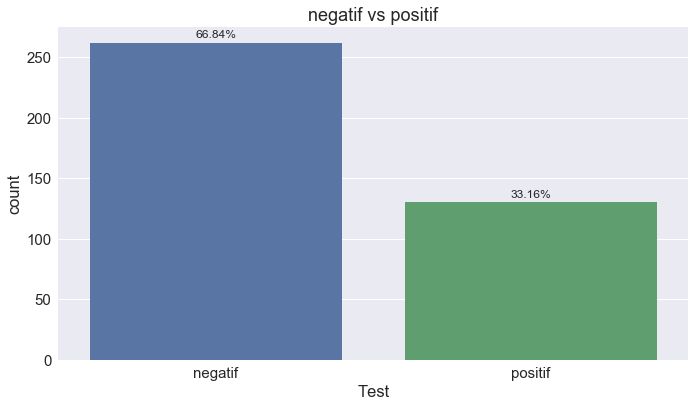

In [8]:
sns.set(font_scale=1.5) 
f,ax=plt.subplots(figsize=(10,6))
sns.countplot('test',data=pima,ax=ax)
ax.set_title('negatif vs positif')
ax.set_xlabel('Test')
total = float(len(pima))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.2f}%'.format((height/total)*100),
            ha="center", size=12) 
plt.tight_layout()   
plt.show()

→ Out of the entire dataset, 130 or 33.16% of the patients showed signs of diabetes. We need to dig down to individual features to get better insights from the data.

→ We will start by exploring impact of different features on diabetes manifestation. And then we will further dive into how multiple features are responsible to impact the target. But before jumping into all these, let's take a look at the dataset holistically.

In [9]:
pf.ProfileReport(pima)

This nice overview will allow to take more scientific decisions while exploring individual features.
Quick overview:<br/>
    → Age column contains a lot of younger people<br/>
    → Around 15% women were never pregnant<br/>
    → Insulin-glucose | pregnant-age | tricep-bmi show relatively high correlation as expected. 

<a id='loadd'><a/>
## **1.D. Analysis of individual features**

## Types Of Features
The 2 broad classes of variables in the dataset are categorical and continuous.<br/> 
### Categorical Features:
A categorical variable is one that is limited to finite number of categories. Categories can be labels or discrete numerical values. For example, gender is a categorical variable having two categories (male and female). Categorical features can be further divided into nominal and ordinal data.<br/>
* **Ordinal data** has a natural ordering but the difference between the orders is not measurable. For example, cancer stage 4 is worse than stage 3 (an order), but we can not quantify how much worse.<br/>
* **Nominal data** are the categorical data without any natural ordering. For example, all available hair color dyes.<br/> 
**► Categorical Features in the dataset: test**<br/>

### Continuous Feature:
A continuous variable can take an infinite set of numerical values.<br/> 
**► Continuous Features in the dataset: pregnant, glucose, diastolic, triceps, insulin, bmi, diabetes, age**

In [10]:
# select features with <15 unique elements as categories 
pima.nunique()

pregnant      17
glucose      117
diastolic     37
triceps       48
insulin      184
bmi          194
diabetes     331
age           43
test           2
dtype: int64

In [11]:
# update data dictionary about feature type
c, o = 'continuous', 'ordinal'
d = {'pregnant':c, 'glucose':c, 'diastolic':c, 'triceps':c, 'insulin':c, 'bmi':c,
       'diabetes':c, 'age':c, 'test':o}
pima_dictionary2['Feature Info'] = pd.Series(d)
pima_dictionary2

Description  \
Column Name                                                                                                                             
pregnant                                                                       number of times the woman got pregnant during her life   
glucose                                   it represents the plasma glucose concentration at 2 hours in an oral glucose tolerance test   
diastolic                                                                       diastolic blood pressure  measures heath of the heart   
triceps                                                                                               value used to estimate body fat   
insulin                                                             it represents the rate of insulin 2 hours serum insulin (mu U/ml)   
bmi          represents the Body Mass Index (weight in kg / (height in meters squared), and is an indicator of the health of a person   
diabetes                                                                      it is an indicator of history of diabetes in the family   
age                                                                                                  age in years of the Pima’s woman   
test                           can take only 2 values (‘negatif’ or ‘positif’) and represents if the patient shows signs of diabetes.   

            Data Type Feature Info  
Column Name                         
pregnant        int64   continuous  
glucose         int64   continuous  
diastolic       int64   continuous  
triceps         int64   continuous  
insulin         int64   continuous  
bmi           float64   continuous  
diabetes      float64   continuous  
age             int64   continuous  
test           object      ordinal

### Pregnant ► continuous feature
Number of times women got pregnant during her life.<br/> 
♦ **Hypothesis:** Whether an individual has ever been pregnant as well as number of pregnancies of an individual have an impact on the target. 

In [12]:
pd.crosstab(pima['pregnant'], pima['test']).T.style.background_gradient(cmap='summer_r')

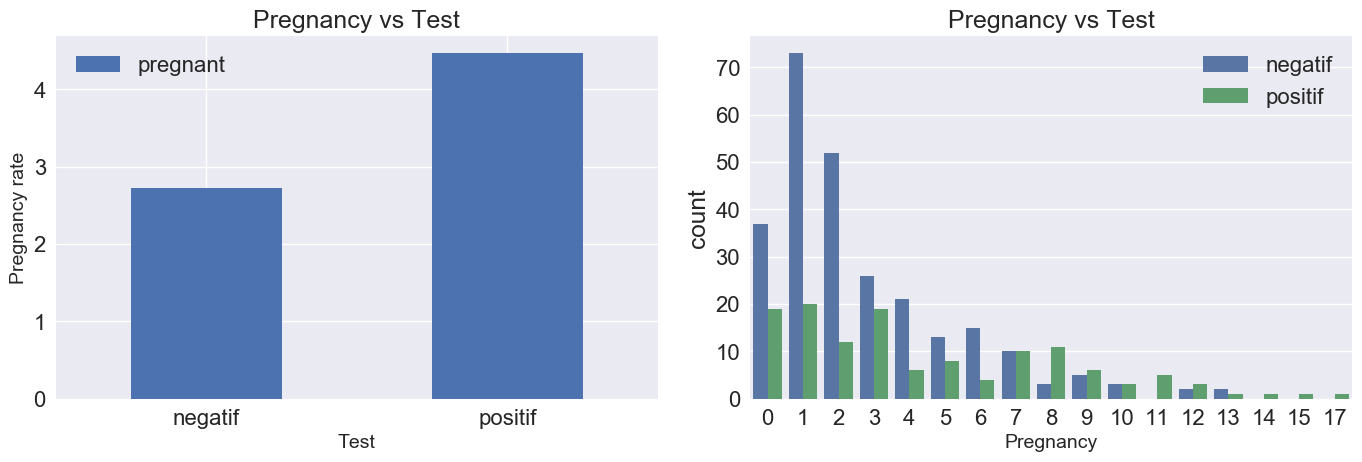

In [13]:
sns.set(font_scale=1.6) 
f,ax=plt.subplots(1,2,figsize=(14,5))
pima.groupby('test').agg({'pregnant':'mean'}).plot.bar(ax=ax[0])
ax[0].set_title('Pregnancy vs Test', size=18)
ax[0].set_ylabel('Pregnancy rate', size=14)
ax[0].set_xlabel('Test', size=14)
xticklabels = ['negatif', 'positif']
ax[0].set_xticklabels(xticklabels, rotation = 0)

sns.countplot('pregnant',hue='test',data=pima,ax=ax[1])
ax[1].set_title('Pregnancy vs Test', size=18)
ax[1].set_xlabel('Pregnancy', size=14)
ax[1].legend(loc='upper right')
plt.tight_layout()   
plt.show()
#f.savefig('test_rotation.png', dpi=300, format='png', bbox_inches='tight')
#plt.style.use('classic')

** Observation:** <br/>
`positif` group has higher pregnancy rate. It is also evident that women with more than 6 pregnancies have a higher chance of manifesting diabetes or making into `positif` group.

→ Thus, **pregnancy** might be an important feature for predictive modeling of diabetes.

◘ As pregnancy has 17 unique values, if we can make a categorical feature based on number of pregnancies, it might be a better predictor of `test`. Let's explore that.

In [14]:
# feature engineering_pregnencies
pima['pregnency_group']=pd.cut(pima['pregnant'],[0, 6, 12, 18],
                            include_lowest=True, labels=['1', '2', '3'])
pd.crosstab(pima['pregnency_group'], pima['test']).style.background_gradient(cmap='summer_r')

In [15]:
def percConvert(ser):
    return ser/float(ser[-1])
pd.crosstab(pima['pregnency_group'], pima['test'],margins=True).apply(percConvert, axis=1)

test              negatif   positif  All
pregnency_group                         
1                0.729231  0.270769  1.0
2                0.377049  0.622951  1.0
3                0.333333  0.666667  1.0
All              0.668367  0.331633  1.0

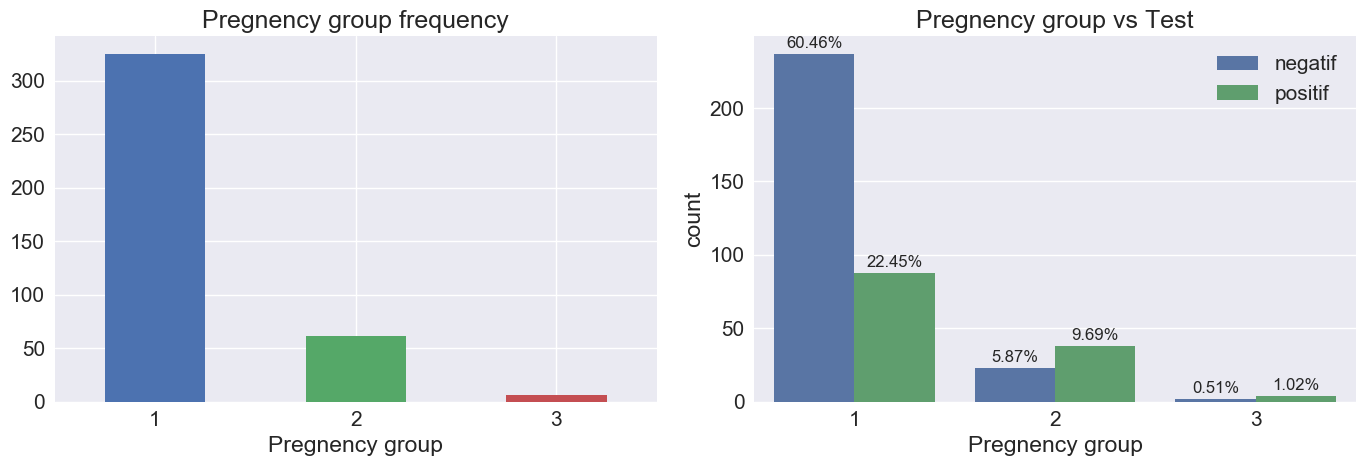

In [16]:
sns.set(font_scale=1.5) 
f,ax=plt.subplots(1,2,figsize=(14,5))
pima['pregnency_group'].value_counts(sort=False).plot.bar(ax=ax[0])
ax[0].set_title('Pregnency group frequency')
ax[0].set_xlabel('Pregnency group')
ax[0].set_xticklabels(['1', '2', '3'], rotation = 0)

sns.countplot('pregnency_group',hue='test',data=pima,ax=ax[1])
ax[1].set_title('Pregnency group vs Test')
ax[1].set_xlabel('Pregnency group')
ax[1].legend(loc='upper right')
total = float(len(pima))
for p in ax[1].patches:
    height = p.get_height()
    ax[1].text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.2f}%'.format((height/total)*100),
            ha="center", size=12) 
plt.tight_layout()   
plt.show()

**Observation:** <br/>
Data mostly contains women who has been pregnant <= 6 times. Ratio of `positif` to `negatif` increases significantly from the 2nd pregnancy group.<br/>
→ *From initial exploration, it seems number of pregnancies of an individual has an impact on the target.*

In [17]:
# exploring pregnant vs non-pregnant groups
cols= ['glucose', 'diastolic', 'triceps', 'insulin', 'bmi', 'diabetes', 'age', 'test']
filt= pima['pregnant']==0
s = pima[filt][cols].mean()
s1 = pima[~filt][cols].mean()
s2 = pima[pima['pregnant']>6][cols].mean()
pd.DataFrame(data = {'Never Pregnant':s, 'Pregnant':s1,'Pregnant >6':s2 }).T.style.background_gradient(cmap='summer_r')

In [18]:
print(pima[filt]['test'].value_counts())
pima[~filt]['test'].value_counts()

negatif    37
positif    19
Name: test, dtype: int64


negatif    225
positif    111
Name: test, dtype: int64

→ Another interesting observation was to understand what difference pregnancy can cause to the women w.r.t women who has never been pregnant. Except some obvious findings like pregnant group has higher mean age, it does not reveal anything insightful. Rather rest of the continuous variable is higher for  never pregnant group, which would not be the first guess.<br/><br/>
→ However in agreement with previous findings, when number of pregnancies goes beyond 6 most of these values increase.
 
→ *Contrary to initial hypothesis, pregnant group has no impact on `test` w.r.t never-pregnant group.*

### Glucose ► continuous feature

♦ **Hypothesis:** As manifestation of diabetes directly impacts glucose level in the body, we can hypothesize it to be a critical determinant of diabetes.

In [19]:
print('Highest glucose level:',pima['glucose'].max())
print('Lowest glucose level:',pima['glucose'].min())
print('Average glucose level:',round(pima['glucose'].mean(),2))

Highest glucose level: 198
Lowest glucose level: 56
Average glucose level: 122.63


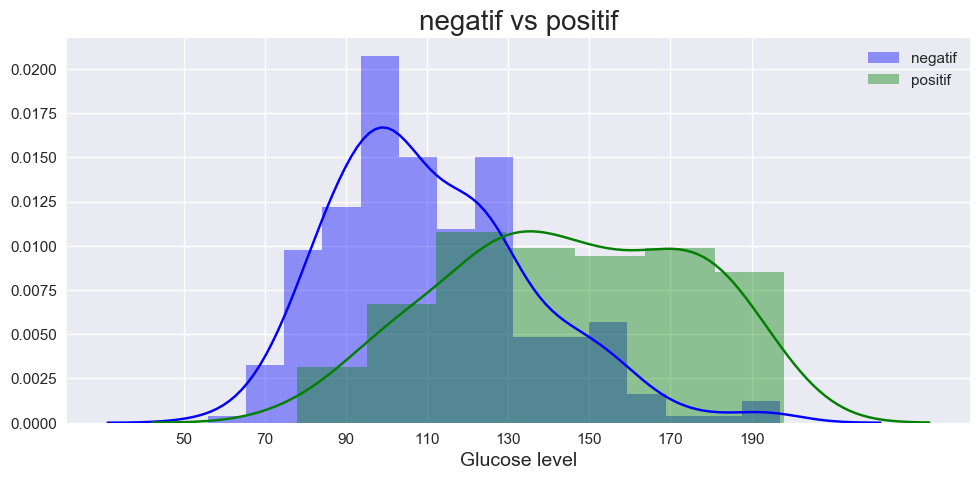

In [20]:
sns.set(font_scale=1.1) 
f,ax=plt.subplots(figsize=(10,5))
sns.distplot(pima[pima['test']=='negatif'].glucose,ax=ax, color= 'blue', label='negatif')
sns.distplot(pima[pima['test']=='positif'].glucose,ax=ax, color='green', label='positif')
x=list(range(50,201,20))
ax.set_xticks(x)
ax.set_title('negatif vs positif', size=20)
ax.set_xlabel('Glucose level', size=14)
ax.legend()
plt.tight_layout()   
plt.show()

** Observation:**<br/> 
→ In case of `negatif` test population, a wide range of plasma glucose concentration is observed  and from the distribution it looks left skewed i.e. towards less concentration.<br/> 
→ But for `positif` group it is not surprising to notice from the plot, the population will be having higher plasma glucose level, which supports our hypothesis. As `positif` group are prone towards diabetes, most likely their carbohydrate metabolism is impaired leading to high plasma glucose concentration.

→ *Thus plasma **glucose** concentration looks to be an extremely important feature for predictive modeling of diabetes.*

◘ As it might be interesting to see how American Diabetes Association treats plasma glucose level related to diabetes manifestation, following their guidelines glucose concentration was converted into 3 groups-<br/>
→ **Normal**( > 140 mg/dl of glucose), <br/>
→ **Prediabetes** (140-199 mg/dl of glucose), <br/> 
→ **Diabetes** ( > 200 mg/dl of glucose). 

In [21]:
# feature engineering_glucose
pima['glucose_group']=pd.cut(pima['glucose'],[50,139.99,199.99,250],
                            include_lowest=False, labels=['normal', 'prediabetes', 'diabetes'])
pd.crosstab(pima['glucose_group'], pima['test']).style.background_gradient(cmap='summer_r')

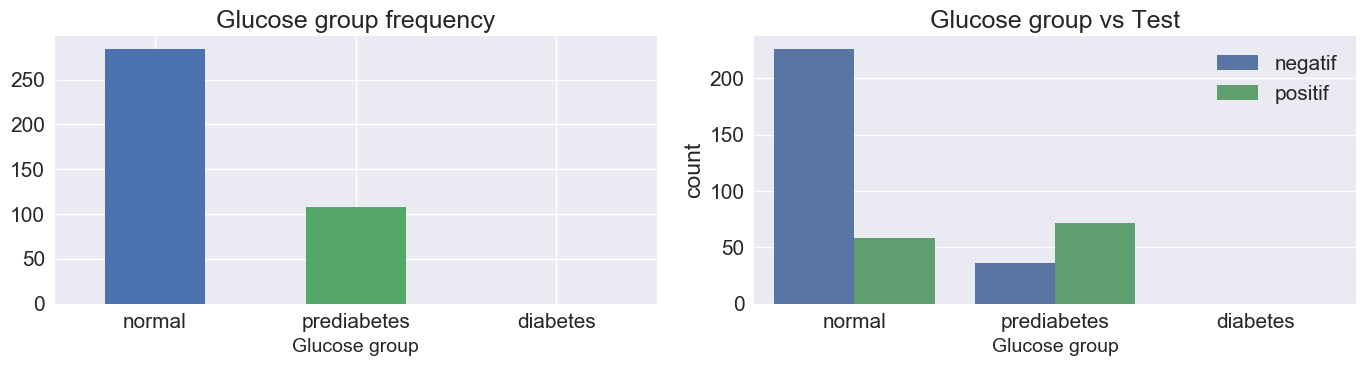

In [22]:
sns.set(font_scale=1.5) 
f,ax=plt.subplots(1,2,figsize=(14,4))
pima['glucose_group'].value_counts().plot.bar(ax=ax[0])
ax[0].set_xlabel('Glucose group', size=14)
ax[0].set_xticklabels(['normal', 'prediabetes', 'diabetes'], rotation = 0)
ax[0].set_title('Glucose group frequency', size=18)

sns.countplot('glucose_group',hue='test',data=pima,ax=ax[1])
ax[1].set_title('Glucose group vs Test', size=18)
ax[1].set_xlabel('Glucose group', size=14)
ax[1].legend(loc='upper right')
plt.tight_layout()   
plt.show()

**Observation :** <br/>
Converting glucose feature (continuous) into categories based on American Diabetes Association parameters lead us to some interesting insights. Based on their proposed scale, no one is in diabetic zone now. However, many people are in prediabetic category. <br/> 

→ Ratio of `positif`:`negatif` increases significantly from normal category of glucose to the prediabetic category.* 

◘ To decipher what would a finer splitting of glucose variable do, glucose feature was further divided into 5 bins.

In [23]:
# feature engineering_glucose
pima['glucose_group_N']=pd.cut(pima['glucose'],[50,80,110,140,170,200],
                            include_lowest=False, labels=['1', '2', '3', '4', '5'])

In [24]:
pd.crosstab(pima['glucose_group_N'], pima['test']).T.style.background_gradient(cmap='summer_r')

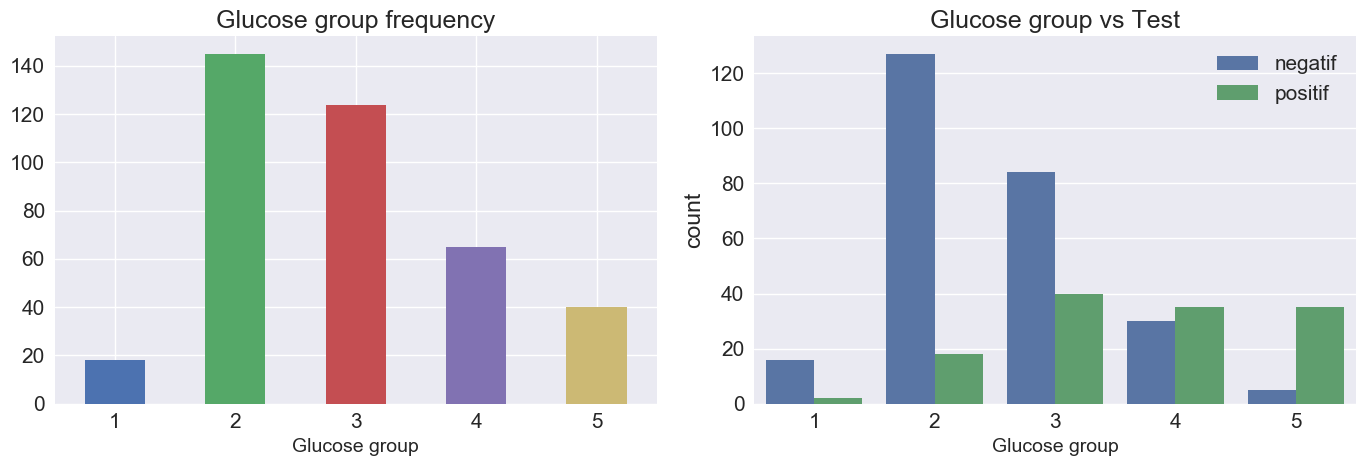

In [25]:
sns.set(font_scale=1.5) 
f,ax=plt.subplots(1,2,figsize=(14,5))
label=['1', '2', '3', '4', '5']
pima['glucose_group_N'].value_counts(sort=False).plot.bar(ax=ax[0]) 
ax[0].set_xticklabels(['1', '2', '3', '4', '5'], rotation = 0)
ax[0].set_title('Glucose group frequency', size=18)
ax[0].set_xlabel('Glucose group', size=14)

sns.countplot('glucose_group_N',hue='test',data=pima,ax=ax[1])
ax[1].set_title('Glucose group vs Test', size=18)
ax[1].set_xlabel('Glucose group', size=14)
ax[1].legend(loc='upper right')
plt.tight_layout()   
plt.show()

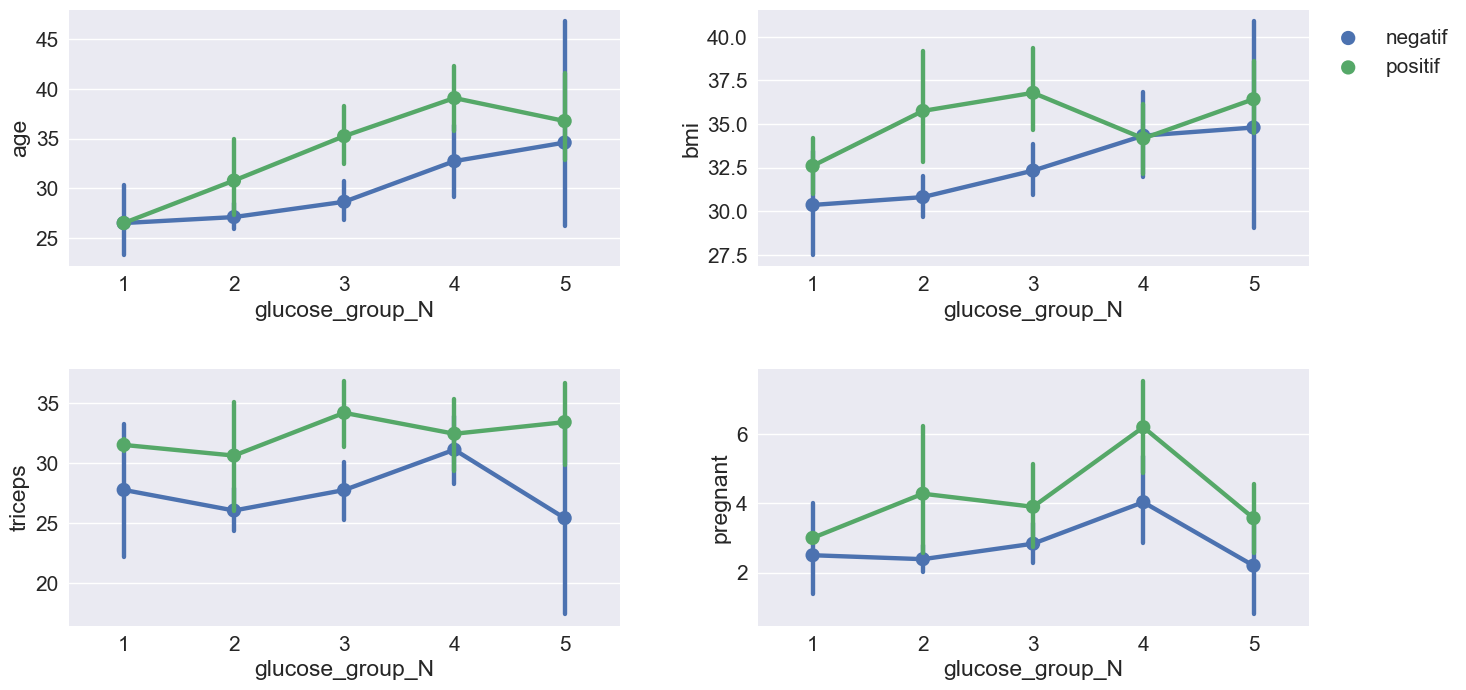

In [26]:
sns.set(font_scale=1.5) 
f,ax=plt.subplots(2,2,figsize=(16,8), gridspec_kw={'wspace': 0.25, 'hspace': 0.4})
sns.pointplot('glucose_group_N','age',hue='test', data=pima, ax=ax[0,0])
ax[0,0].legend_.remove()
sns.pointplot('glucose_group_N','bmi',hue='test',data=pima, ax=ax[0,1])
ax[0,1].legend(loc=0, bbox_to_anchor=(1,1))
sns.pointplot('glucose_group_N','triceps',hue='test',data=pima, ax=ax[1,0])
ax[1,0].legend_.remove()
sns.pointplot('glucose_group_N', 'pregnant', hue='test', data=pima, ax=ax[1,1])
ax[1,1].legend_.remove()
plt.tight_layout()
plt.show()

**Observation:** <br/>
→ Age and BMI is higher for `positif` group in case of 2-4th and 2-3rd bins respectively. <br/>
→ Triceps and pregnancy was relatively higher for the all the bins in case of `positif` and thus could be important feature for modeling as well

In [27]:
pima.groupby(['test','glucose_group_N']).agg({'diastolic': 'mean', 'triceps': 'mean',
'bmi':'mean', 'age':'mean'}).round(2).style.background_gradient(cmap='summer_r')

**Observation:**<br/>
Age, BMI, triceps(body fat), diastolic blood pressure is higher for `positif` group in comparison to `negatif` group. We could interpret this as-<br/>
→ As one person is more prone to diabetes which has higher chance to manifest as an individual gets older. <br/>
→ Higher chance of diabetes will lead to higher glucose content in blood as they can not metabolize glucose leading to higher body fat, bmi and diastolic blood pressure

### Diastolic ► continuous feature
Diastolic blood pressure (mm/Hg) is well established method to measure heart health of an individual. Elucidating its relationship with `test` will  help us to build our machine learning model.<br/>
♦ **Hypothesis:** `positif` group prone to diabetes would have manifestation of bad health leading to high blood pressure.

In [28]:
print('Highest diastolic count:',pima['diastolic'].max())
print('Lowest diastolic count:',pima['diastolic'].min())
print('Average diastolic count:',round(pima['diastolic'].mean(),2))
pima.groupby('test').agg({'diastolic':['mean','median', 'std']}).style.background_gradient(cmap='summer_r')

Highest diastolic count: 110
Lowest diastolic count: 24
Average diastolic count: 70.66


→ Although diastolic blood pressure is higher in the case of `positif` test variable, however also has a higher standard deviation. We can go statistics route and measure confidence interval with bootstrap but we can also explore its distribution and make an idea with progressive steps how critical this variable might be for our prediction modeling.

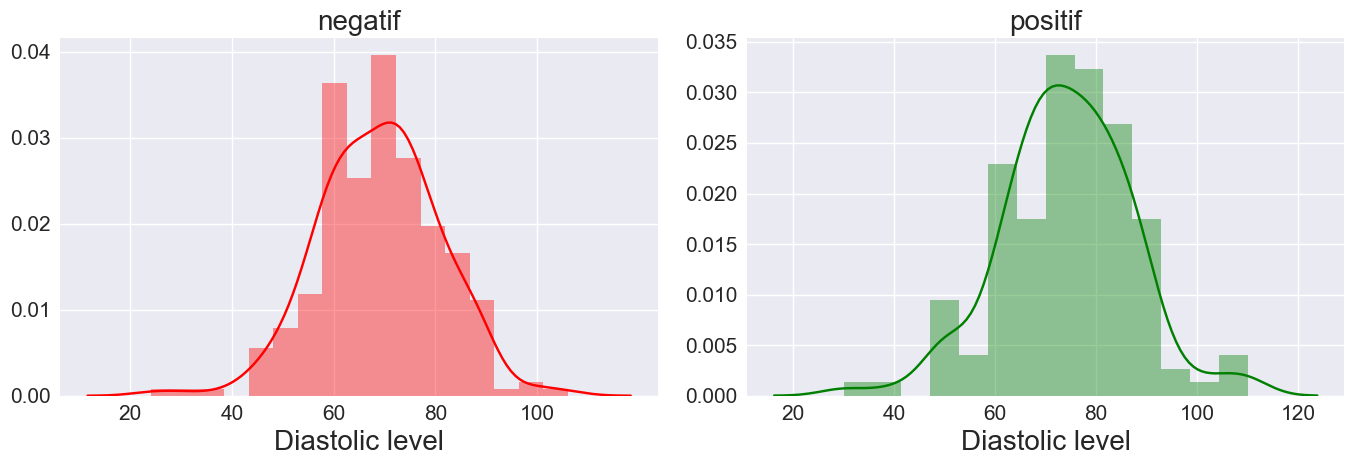

In [29]:
f,ax=plt.subplots(1,2,figsize=(14,5))
sns.distplot(pima[pima['test']=='negatif'].diastolic,ax=ax[0], color= 'red')
ax[0].set_title('negatif', size=20)
ax[0].set_xlabel('Diastolic level', size=20)
x1=list(range(20,120,20))
ax[0].set_xticks(x1)

sns.distplot(pima[pima['test']=='positif'].diastolic,ax=ax[1], color='green')
ax[1].set_title('positif', size=20)
ax[1].set_xlabel('Diastolic level', size=20)
x2=list(range(20,125,20))
ax[1].set_xticks(x2)
plt.tight_layout()   
plt.show()

**Observation:** <br/>
→ In case of both `positif` and `negatif` test groups we see a wide range of diastolic blood pressure. However for both the categories we do not observe any critical changes in the distribution pattern (if not we explore it in statistics route) which might be unsurprising based on what we observed when we see the mean and standard deviation of diastolic blood pressure between `positif` and `negatif` groups. 

◘ However it might be interesting to see what insights can be unraveled if we categorize this continuous variable based on American Heart Association's guidelines:<br/> 
→ **Normal** (diastolic blood pressure (B.P) < 80 mm Hg), <br/> 
→ **prehypertension** (diastolic blood pressure (B.P): 80-89 mm Hg), and <br/> 
→ **High** (diastolic blood pressure (B.P) > 90 mm Hg).

In [30]:
# feature engineering_diastolic
pima['diastolic_group']=pd.cut(pima['diastolic'],[20,79.99,89.99,115],
                            include_lowest=False, labels=['normal', 'prehypertension', 'high'])
pd.crosstab(pima['diastolic_group'], pima['test'], margins=False).round(3).style.background_gradient(cmap='summer_r')

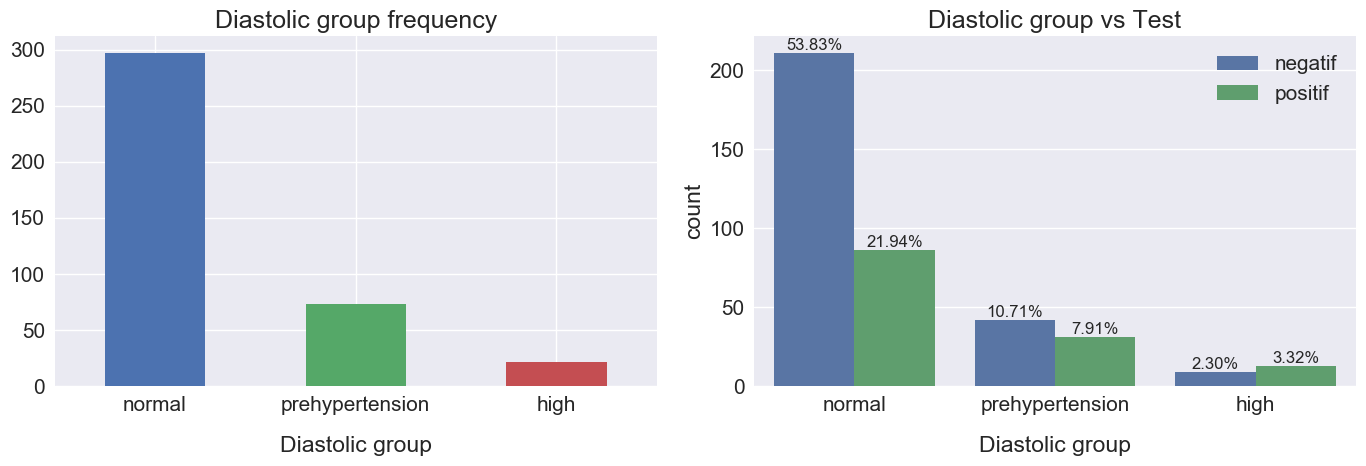

In [31]:
f,ax=plt.subplots(1,2,figsize=(14,5))
pima['diastolic_group'].value_counts().plot.bar(ax=ax[0])
ax[0].set_xlabel('Diastolic group', labelpad = 15)
xticklabels = ['normal', 'prehypertension', 'high']
ax[0].set_xticklabels(xticklabels, rotation = 0)
ax[0].set_title('Diastolic group frequency')

sns.countplot('diastolic_group',hue='test',data=pima,ax=ax[1])
ax[1].set_title('Diastolic group vs Test')
ax[1].set_xlabel('Diastolic group', labelpad = 15)
ax[1].legend(loc='upper right')
total = float(len(pima))
for p in ax[1].patches:
    height = p.get_height()
    ax[1].text(p.get_x()+p.get_width()/2.,
            height + 2,
            '{:1.2f}%'.format((height/total)*100),
            ha="center", size=12) 
plt.tight_layout()   
plt.show()

**Observation:** <br/>
→ Although number of observations are much higher in `normal` diastolic group w.r.t. other two groups, we observe ratio of `positif`:`negatif` increases from **0.4** to **0.7** to **1.45** as diastolic blood pressure increases from normal to prehypertension to high. This aligns well with initial hypothesis. 

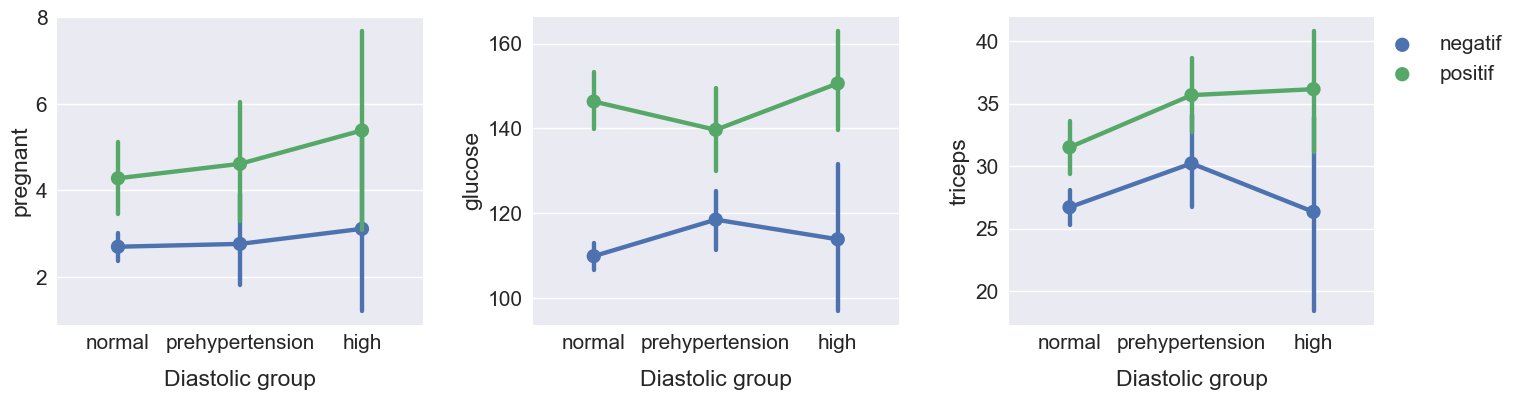

In [32]:
f,ax=plt.subplots(1,3,figsize=(17,4), gridspec_kw={'wspace': 0.3, 'hspace': 0.3})
sns.pointplot('diastolic_group', 'pregnant',hue='test', data=pima, ax=ax[0])
ax[0].legend_.remove()
ax[0].set_xlabel('Diastolic group', labelpad = 12)

sns.pointplot('diastolic_group', 'glucose',hue='test', data=pima, ax=ax[1])
ax[1].legend_.remove()
ax[1].set_xlabel('Diastolic group', labelpad = 12)

sns.pointplot('diastolic_group', 'triceps',hue='test', data=pima, ax=ax[2])
ax[2].legend(loc=0, bbox_to_anchor=(1.4,1))
ax[2].set_xlabel('Diastolic group', labelpad = 12)

plt.tight_layout()
plt.show()

In [33]:
pima.groupby(['test','diastolic_group']).agg({'glucose':'mean','triceps': 'mean', 
'bmi':'mean','age':'mean'}).round(2).style.background_gradient(cmap='summer_r')

**Observation:** <br/>
→ Pregnancy rate was higher in case of `positif` for all diastolic categories. Interestingly, same trend was seen as glucose level and triceps were elevated in case  of `positif` for all diastolic categories. We can expect these categories to have higher correlation. <br/>
→ As we see these features are well separated in `negatif` and `positif` irrespective of all the bins, we might proceed with the continuous variable for target modeling. <br/>
→ As mentioned before, as `positif` has higher glucose this leads to higher body fat, bmi and thus high diastolic blood pressure.

### Triceps ► continuous feature
This feature estimates body fat (mm). <br/>
♦ **Hypothesis:** As in `positif` group insulin production and/or glucose metabolism would be impaired in comparison to the `negatif`, higher triceps value will be encountered. Also, we can expect the triceps value to increase as an individual gets older. 

In [34]:
print('Highest triceps count:',pima['triceps'].max())
print('Lowest triceps count:',pima['triceps'].min())
print('Average triceps count:',round(pima['triceps'].mean(),2))
pima.pivot_table(index='glucose_group_N', columns='test', values='triceps', 
    aggfunc='mean').astype('int').style.background_gradient(cmap='summer_r')

Highest triceps count: 63
Lowest triceps count: 7
Average triceps count: 29.15


`positif` group has higher mean tricep value (body fat) for all categories of glucose, as expected.

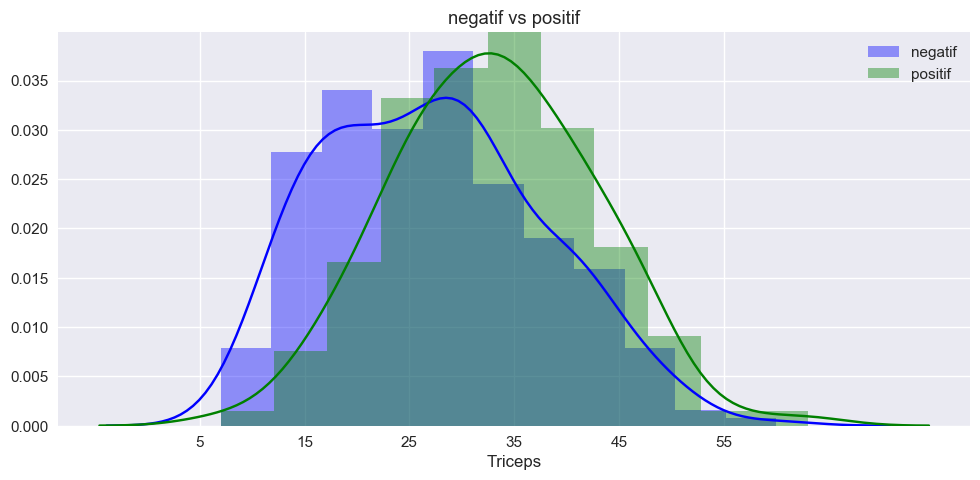

In [35]:
sns.set(font_scale=1.1) 
f,ax=plt.subplots(figsize=(10,5))
sns.distplot(pima[pima['test']=='negatif'].triceps,ax=ax, color= 'blue', label='negatif')
sns.distplot(pima[pima['test']=='positif'].triceps,ax=ax, color='green', label='positif')
x=list(range(5,65,10))
ax.set_xticks(x)
ax.set_title('negatif vs positif')
ax.set_xlabel('Triceps')
ax.legend()
plt.tight_layout()   
plt.show()

**Observation:** <br/>
→ In case of both `positif` and `negatif` a wide range of body fat value is observed. `negatif` distribution seem left skewed whereas triceps for `positif` seems to have a gaussian distribution. That can be confirmed by running ECDF (Empirical cumulative distribution function) of observed and simulated `positif` data for triceps. 

◘ As we see `positif` has higher triceps measurement which is in agreement with the initial intuition, we can explore it further by converting into categorical.

In [36]:
# feature engineering_triceps
pima['triceps_group']=pd.qcut(pima['triceps'],4,labels=['1', '2', '3', '4'])                            
print(pima['triceps_group'].value_counts())
pd.crosstab(pima['triceps_group'], pima['test'], margins=True).round(3).style.background_gradient(cmap='summer_r')

3    102
1    102
2    100
4     88
Name: triceps_group, dtype: int64


As tricep value increases number of  `positif` observation also increases. 

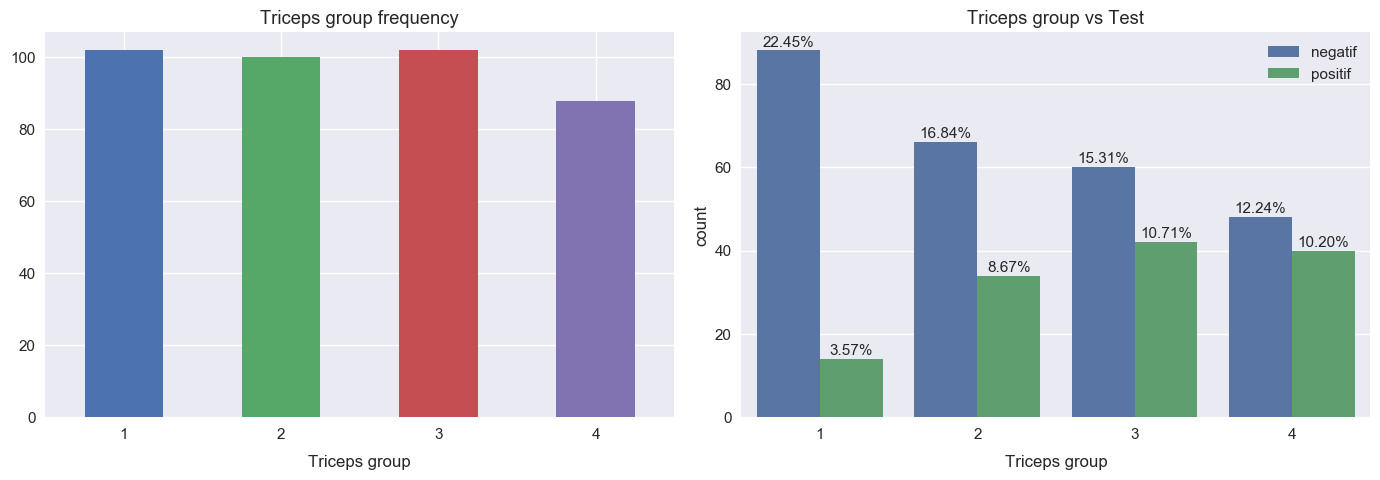

In [37]:
f,ax=plt.subplots(1,2,figsize=(14,5))
pima['triceps_group'].value_counts(sort=False).plot.bar(ax=ax[0])
ax[0].set_xlabel('Triceps group', labelpad = 10)
ax[0].set_xticklabels(['1', '2', '3', '4'], rotation = 0)
ax[0].set_title('Triceps group frequency')

sns.countplot('triceps_group',hue='test',data=pima,ax=ax[1])
ax[1].set_title('Triceps group vs Test')
ax[1].set_xlabel('Triceps group', labelpad = 10)
ax[1].legend(loc='upper right')
total = float(len(pima))
for p in ax[1].patches:
    height = p.get_height()
    ax[1].text(p.get_x()+p.get_width()/2.,
            height + 1,
            '{:1.2f}%'.format((height/total)*100),
            ha="center", size=11) 
plt.tight_layout()   
plt.show()

**Observation:** <br/> 
→ Ratio of positif to negatif increases from **0.15** to **0.5** to **0.7** to **0.83** with the increase of triceps bins. Thus this categorical might have some impact in target modeling.

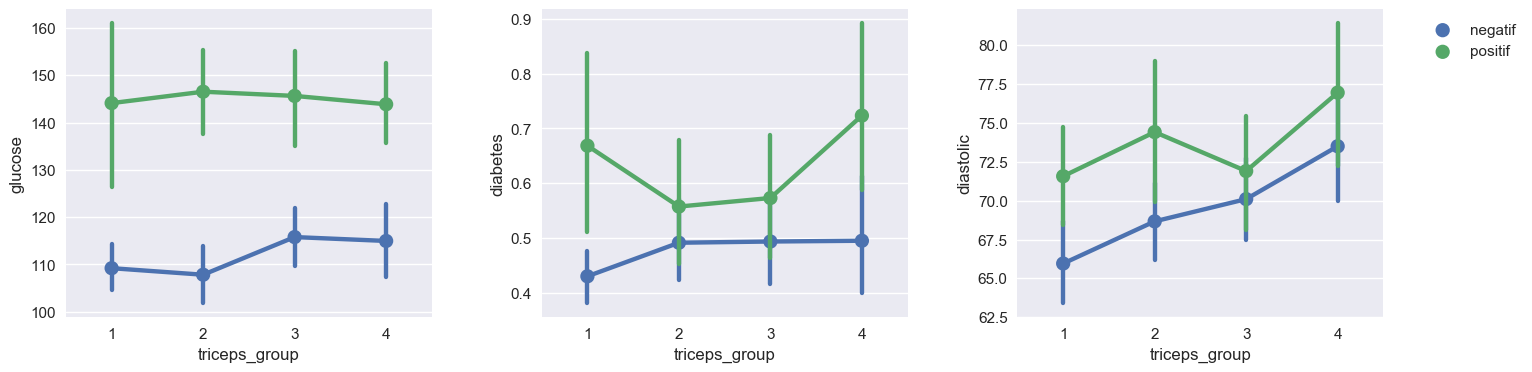

In [38]:
f,ax=plt.subplots(1,3,figsize=(17,4), gridspec_kw={'wspace': 0.3, 'hspace': 0.3})
sns.pointplot('triceps_group', 'glucose',hue='test', data=pima, ax=ax[0])
ax[0].legend_.remove()
sns.pointplot('triceps_group', 'diabetes',hue='test', data=pima, ax=ax[1])
ax[1].legend_.remove()
sns.pointplot('triceps_group', 'diastolic',hue='test', data=pima, ax=ax[2])
ax[2].legend(loc=0, bbox_to_anchor=(1.4,1))
plt.tight_layout()
plt.show()

In [39]:
pima.groupby(['test','triceps_group']).agg({'glucose':'mean','diastolic': 'mean', 'insulin': 'mean',
'bmi':'mean', 'diabetes':'mean'}).round(2).style.background_gradient(cmap='summer_r')

**Observation:** <br/>
→ Mean of glucose, and diastolic blood pressure are elevated in `positif` group irrespective of triceps bin. BMI between the groups follow same trend, i.e. with higher body fat bmi increases in both `positif` and `negatif`. So although binning helped to get insights we might proceed with the continuous variable for target modeling. <br/>
→ Diabetes feature suggesting family history of diabetes seems well elevated in `positif` and a positive correlation exist between diabetic family history and body fat.<br/>
→ Technically, first intuition of having higher insulin would mean, it would metabolize more glucose (thus less chance of diabetes) but we observe higher insulin in `positif` group! Probable rationale behind that would be explained next.

### Insulin ► continuous feature
♦ **Hypothesis:** Higher insulin would metabolize more glucose and thus there would be less chance of diabetes. <br/>
→ However, from previous findings, it seem to be opposite. Let's explore why!

In [40]:
print('Highest insulin count:',pima['insulin'].max())
print('Lowest insulin count:',pima['insulin'].min())
print('Average insulin count:',round(pima['insulin'].mean(),2))
pima.groupby('test').agg({'insulin':['mean',
                'median']}).style.background_gradient(cmap='summer_r')

Highest insulin count: 846
Lowest insulin count: 14
Average insulin count: 156.06


`positif` group has higher insulin amount. High insulin does not always mean less chance of diabetes as evident here (as insulin breaks down carbohydrates). This is also encountered when body is resistant to insulin which in turn increases body fat. Let's explore. 

In [41]:
pima.pivot_table(index='triceps_group', columns='test', values='insulin', 
    aggfunc='mean').T.round(2).style.background_gradient(cmap='summer_r')

→ Each bin of body fat i.e. triceps_group has higher amount of insulin in `positif` group w.r.t. negative group in agreement with previous insight.<br/> 
→ Thus, higher insulin might not lead to higher body fat. However, body can not metabolize glucose by insulin and thus insulin accumulates (as body does not utilize it) and show higher amount in `positif`. There is another possibility discussed in the following section.

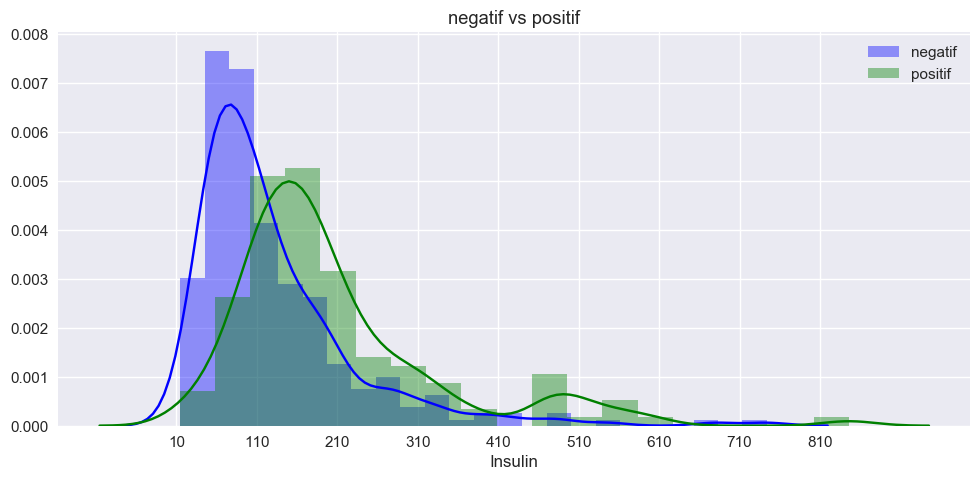

In [42]:
f,ax=plt.subplots(figsize=(10,5))
sns.distplot(pima[pima['test']=='negatif'].insulin,ax=ax, color= 'blue', label='negatif')
sns.distplot(pima[pima['test']=='positif'].insulin,ax=ax, color='green', label='positif')
x=list(range(10,850,100))
ax.set_xticks(x)
ax.set_title('negatif vs positif')
ax.set_xlabel('Insulin')
ax.legend()
plt.tight_layout()   
plt.show()

**Observation:** <br/>
In case of both `positif` and `negatif` a wide range of insulin amount is recorded. `negatif` distribution seem left skewed w.r.t. `positif`. <br/>
◘ Splitting this feature into categories can give us further insights.

In [43]:
pima['insulin_group']=pd.qcut(pima['insulin'], 4, labels=['1', '2', '3', '4'])                            
print(pima['insulin_group'].value_counts(sort=False))
pd.crosstab(pima['insulin_group'], pima['test'], margins=True).round(3).style.background_gradient(cmap='summer_r')

1    98
2    98
3    99
4    97
Name: insulin_group, dtype: int64


Higher observations are encountered in `positif` group with increase in insulin amount. 

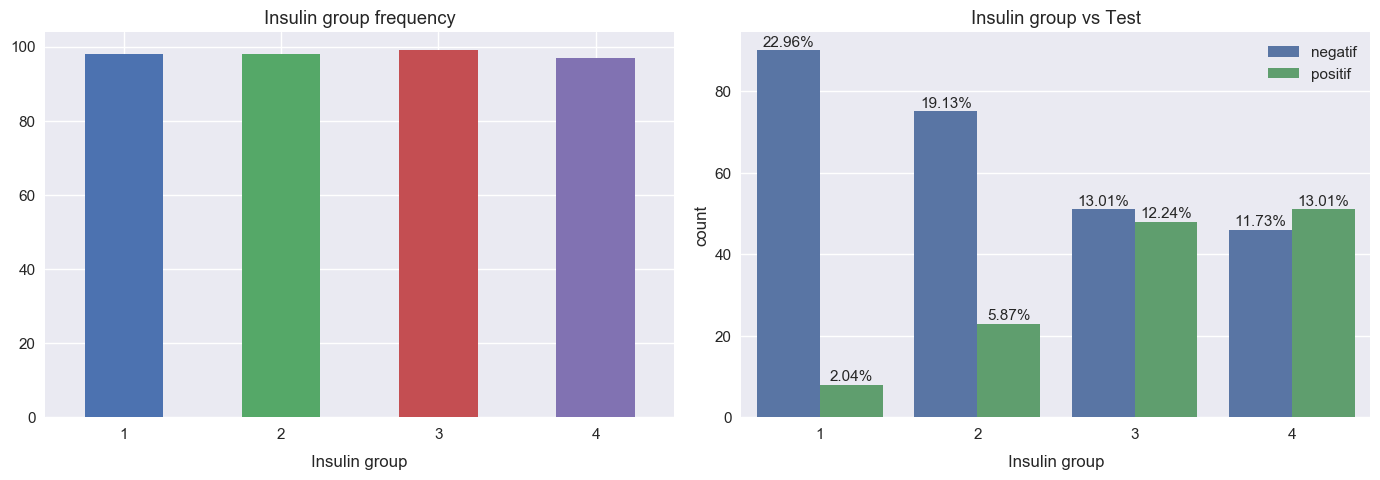

In [44]:
f,ax=plt.subplots(1,2,figsize=(14,5))
pima['insulin_group'].value_counts(sort=False).plot.bar(ax=ax[0])
ax[0].set_xlabel('Insulin group', labelpad = 10)
ax[0].set_xticklabels(['1', '2', '3', '4'], rotation = 0)
ax[0].set_title('Insulin group frequency')

sns.countplot('insulin_group',hue='test',data=pima,ax=ax[1])
ax[1].set_title('Insulin group vs Test')
ax[1].set_xlabel('Insulin group', labelpad = 10)
ax[1].legend(loc='upper right')
total = float(len(pima))
for p in ax[1].patches:
    height = p.get_height()
    ax[1].text(p.get_x()+p.get_width()/2.,
            height + 1,
            '{:1.2f}%'.format((height/total)*100),
            ha="center", size=11) 
plt.tight_layout()   
plt.show()

**Observation:** <br/>
→ Ratio of `positif` to `negatif` increases from **0.08** to **0.3** to **0.9** to **1.11** with the increase of insulin bins. Thus this categorical might have some impact in target modeling.

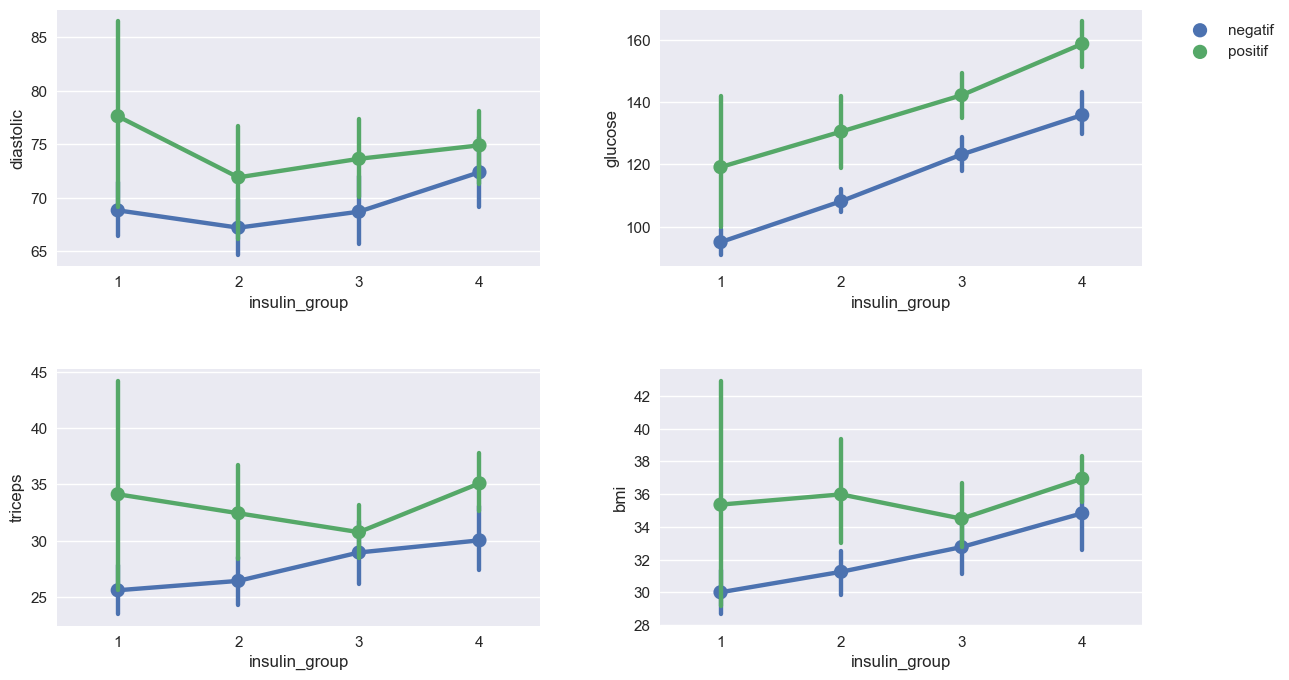

In [45]:
f,ax=plt.subplots(2,2,figsize=(14,8), gridspec_kw={'wspace': 0.25, 'hspace': 0.4})
sns.pointplot('insulin_group', 'diastolic',hue='test', data=pima, ax=ax[0,0])
ax[0,0].legend_.remove()
sns.pointplot('insulin_group', 'glucose',hue='test', data=pima, ax=ax[0,1])
ax[0,1].legend(loc=0, bbox_to_anchor=(1.3,1))
sns.pointplot('insulin_group', 'triceps',hue='test', data=pima, ax=ax[1,0])
ax[1,0].legend_.remove()
sns.pointplot('insulin_group', 'bmi',hue='test', data=pima, ax=ax[1,1])
ax[1,1].legend_.remove()

plt.tight_layout()
plt.show()

**Observation:** <br/>
→ For both `positif` and `negatif` we observe glucose level increases irrespective of insulin bins. This aligns with the idea that body can not utilize insulin to degrade glucose and thus it accumulates. <br/>
→ Another possibility is insulin is produced in higher amount as glucose level increases. `positif` group can not metabolize glucose leading to diabetes. Whereas, `negatif` group can metabolize glucose and thus they are less prone to diabetes.<br/>
→ Mean of most of the features such as diastolic blood pressure, triceps, and bmi all are elevated in `positif` group w.r.t. `negatif` irrespective of insulin bin and thus we might proceed with the continuous variable for target modeling. 

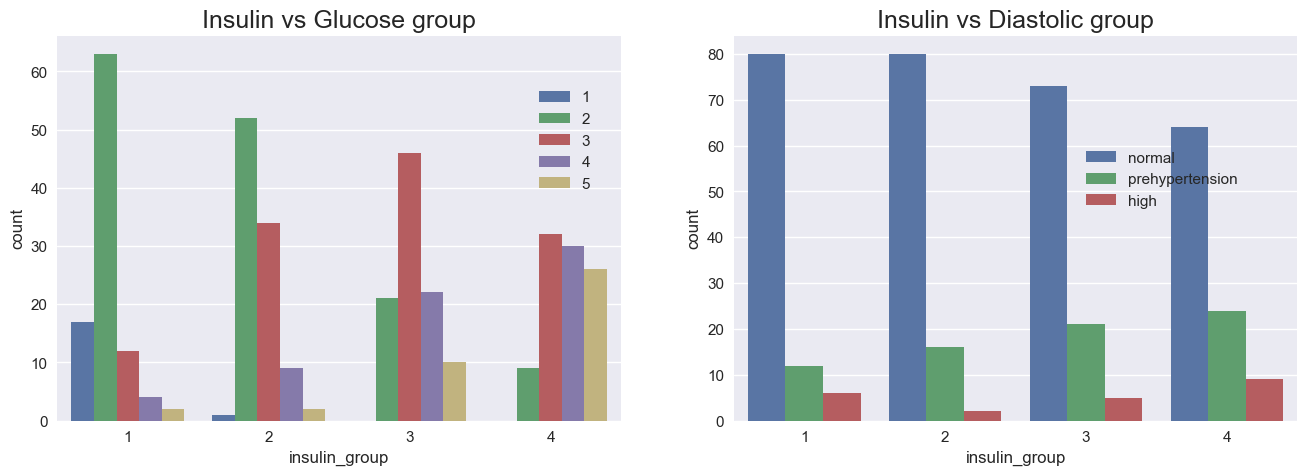

In [46]:
f,ax=plt.subplots(1,2,figsize=(16,5), gridspec_kw={'wspace': 0.2, 'hspace': 0.28})
sns.countplot('insulin_group',hue='glucose_group_N',data=pima,ax=ax[0])
ax[0].set_title('Insulin vs Glucose group', size=18)
ax[0].legend(loc=0, bbox_to_anchor=(0.83,.56))
sns.countplot('insulin_group',hue='diastolic_group',data=pima,ax=ax[1])
ax[1].set_title('Insulin vs Diastolic group', size=18)
ax[1].legend(loc=0, bbox_to_anchor=(0.6,.736))
plt.tight_layout()
plt.show()

In [47]:
pima.groupby(['test','insulin_group']).agg({'glucose': 'mean', 'diastolic': 'mean', 'triceps': 'mean',
'insulin': 'mean', 'diabetes':'mean', 'age':'mean'}).round(2).style.background_gradient(cmap='summer_r')

**Observation:** <br/>
→ Insulin vs glucose group shows the same pattern. <br/>
→ As increase of insulin label is positively correlated with glucose, this can in turn adversely affect heart health leading to higher diastolic blood pressure and more body fat.

### BMI ► continuous feature
Body Mass Index is an indicator of overall health of a person. <br/>
♦ **Hypothesis:** Based on previous findings, we can expect as an individual acquires poor BMI range, glucose-body fat-diastolic blood pressure will degrade as well.

In [48]:
print('Highest BMI:',pima['bmi'].max())
print('Lowest BMI:',pima['bmi'].min())
print('Average BMI:',round(pima['bmi'].mean(),2))
pima.groupby('test').agg({'bmi':['mean', 'std']}).style.background_gradient(cmap='summer_r')

Highest BMI: 67.1
Lowest BMI: 18.2
Average BMI: 33.09


BMI of `positif` group is higher than `negatif` with a similar standard deviation.  

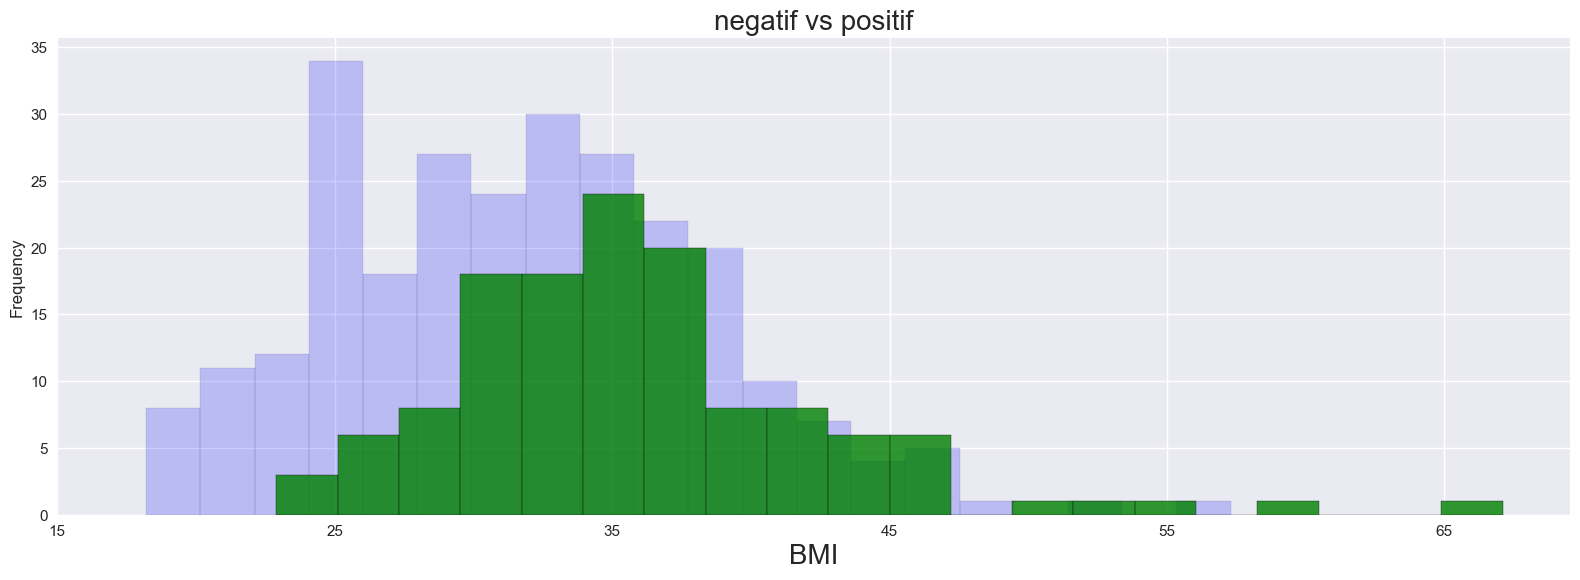

In [49]:
f,ax=plt.subplots(figsize=(16,6))
pima[pima['test']=='negatif'].bmi.plot.hist(ax=ax,bins=20,edgecolor='black',color='blue', alpha=0.2)
pima[pima['test']=='positif'].bmi.plot.hist(ax=ax,color='green',bins=20,edgecolor='black', alpha=0.8)
ax.set_title('negatif vs positif', size=20)
ax.set_xlabel('BMI', size=20)
x1=list(range(15,70,10))
ax.set_xticks(x1)
plt.tight_layout()   
plt.show()

→ BMI value for `negatif` is skewed towards left.<br/>
◘ Converting BMI into categories might give us some insights. Initially, splitting data based on CDC's recommendation on BMI splitted data unevenly. Thus quantile based cut is used for insightful data exploration.

In [50]:
pima['bmi_group']=pd.qcut(pima['bmi'], 4, labels=['1', '2', '3', '4'])                            
print(pima['bmi_group'].value_counts(sort=False))
pd.crosstab(pima['bmi_group'], pima['test'], normalize=True).round(3).style.background_gradient(cmap='summer_r')

1    101
2     98
3     96
4     97
Name: bmi_group, dtype: int64


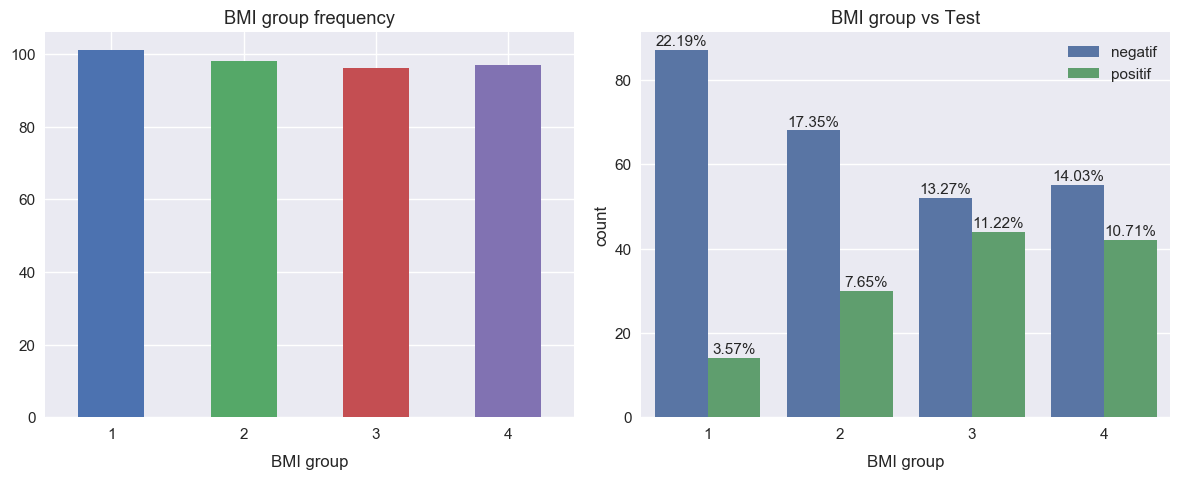

In [51]:
f,ax=plt.subplots(1,2,figsize=(12,5))
pima['bmi_group'].value_counts(sort=False).plot.bar(ax=ax[0])
ax[0].set_xlabel('BMI group', labelpad = 10)
ax[0].set_xticklabels(['1', '2', '3', '4'], rotation = 0)
ax[0].set_title('BMI group frequency')

sns.countplot('bmi_group',hue='test',data=pima,ax=ax[1])
ax[1].set_title('BMI group vs Test')
ax[1].set_xlabel('BMI group', labelpad = 10)
ax[1].legend(loc='1')
total = float(len(pima))
for p in ax[1].patches:
    height = p.get_height()
    ax[1].text(p.get_x()+p.get_width()/2.,
            height + 1,
            '{:1.2f}%'.format((height/total)*100),
            ha="center", size=11) 
plt.tight_layout()   
plt.show()

→ As BMI increases, the ratio of `positif`:`negatif` increases from **0.16** and **0.43** at lower bins to **0.82** and **0.76** at higher bins, which suggests impact of BMI on the test group.

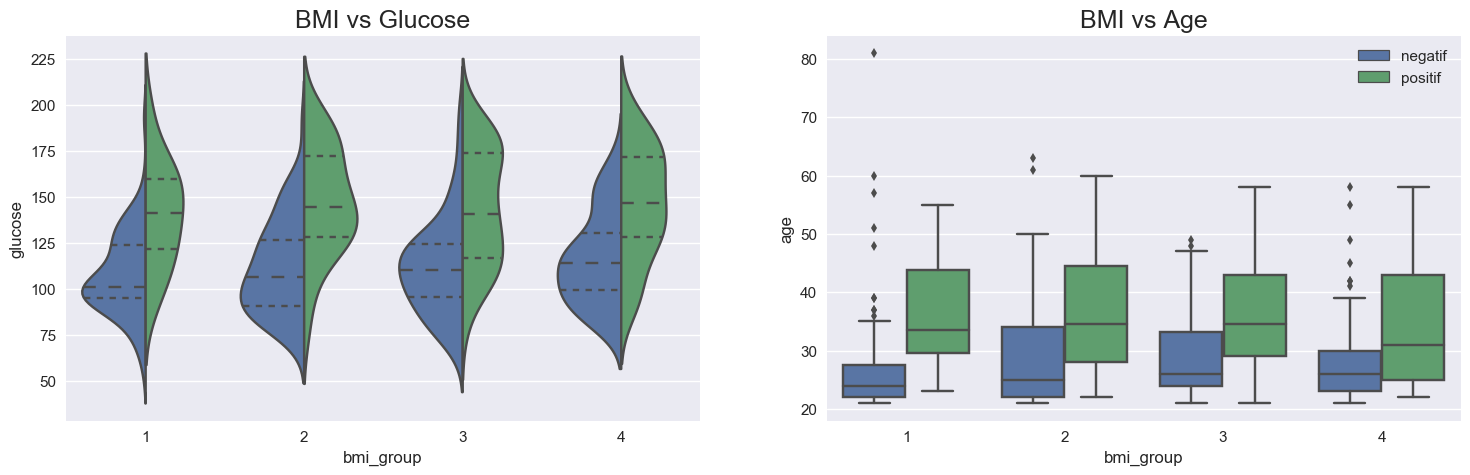

In [52]:
f,ax=plt.subplots(1,2,figsize=(18,5), gridspec_kw={'wspace': 0.2, 'hspace': 0.5})
sns.violinplot('bmi_group', 'glucose',hue='test', split=True, inner='quartile',data=pima, ax=ax[0])
ax[0].set_title('BMI vs Glucose', size=18)
ax[0].legend_.remove()

sns.boxplot('bmi_group', 'age',hue='test',data=pima, ax=ax[1])
ax[1].set_title('BMI vs Age', size=18)
ax[1].legend(loc=0)

plt.tight_layout()
plt.show()

→ For higher BMI, `positif` group has a higher value of glucose, and are relatively older than `negatif` group.
→ Glucose seems to be a very important feature to distinguish `positif` and `negatif` groups so far from data exploration. 

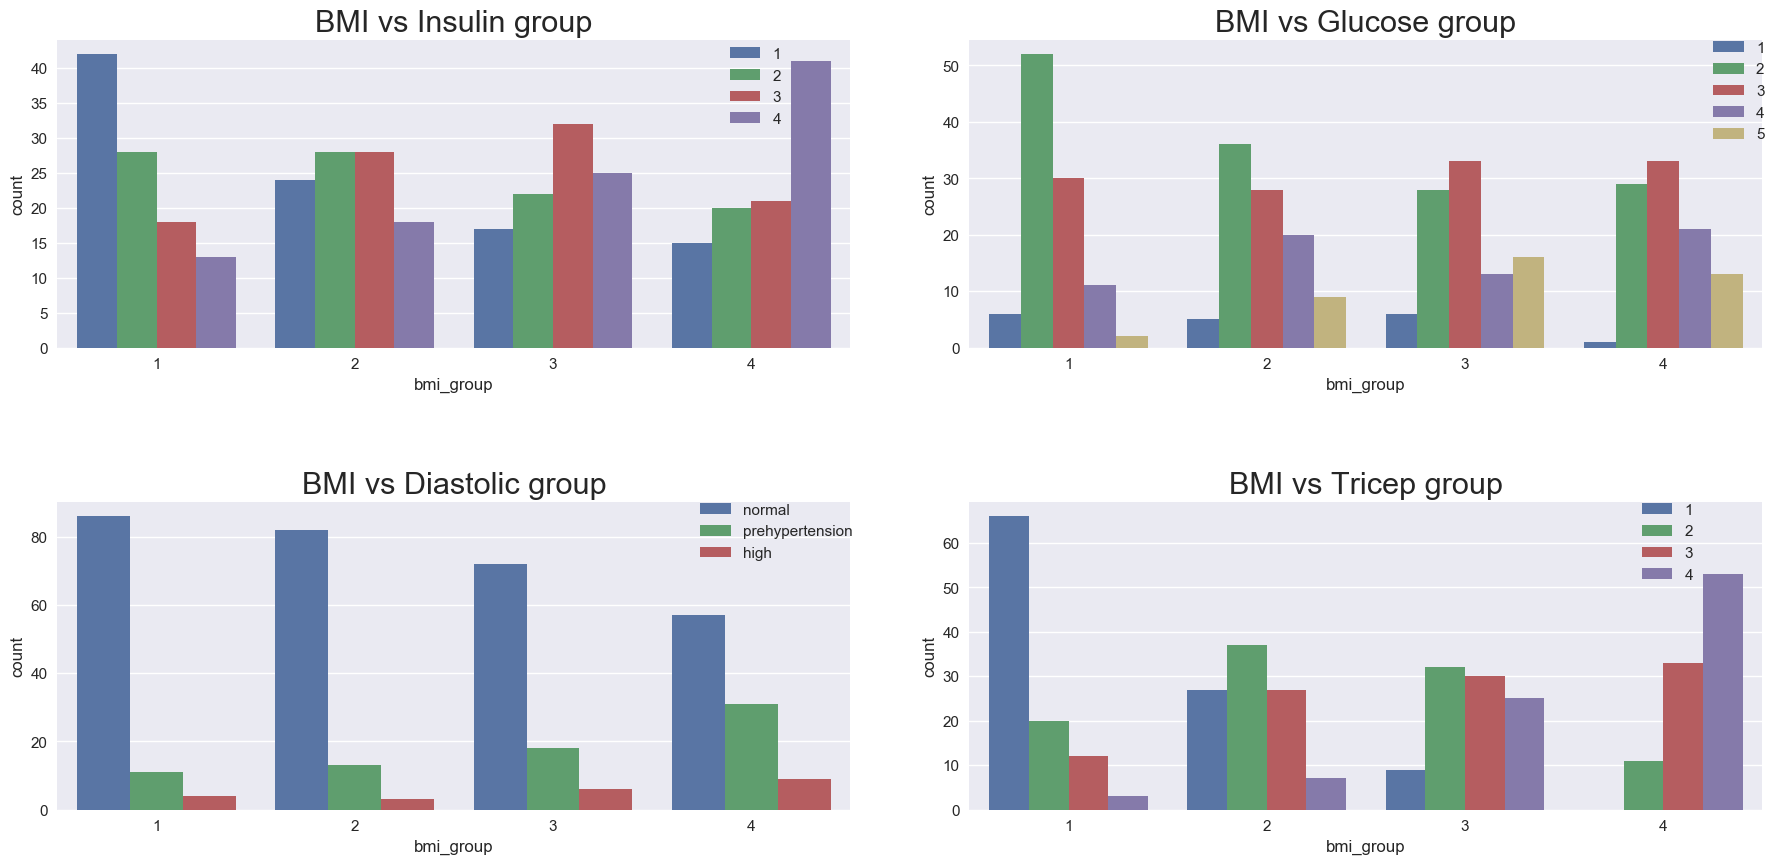

In [53]:
f,ax=plt.subplots(2,2,figsize=(22,10), gridspec_kw={'wspace': 0.15, 'hspace': 0.50})

sns.countplot('bmi_group',hue='insulin_group',data=pima,ax=ax[0,0])
ax[0,0].set_title('BMI vs Insulin group', size=22)
ax[0,0].legend(loc=1, bbox_to_anchor=(.93,1.02))

sns.countplot('bmi_group',hue='glucose_group_N',data=pima,ax=ax[0,1])
ax[0,1].set_title('BMI vs Glucose group', size=22)
ax[0,1].legend(loc=1, bbox_to_anchor=(1.02,1.04))

sns.countplot('bmi_group',hue='diastolic_group',data=pima,ax=ax[1,0])
ax[1,0].set_title('BMI vs Diastolic group', size=22)
ax[1,0].legend(loc=0, bbox_to_anchor=(1.02,1.04))

sns.countplot('bmi_group',hue='triceps_group',data=pima,ax=ax[1,1])
ax[1,1].set_title('BMI vs Tricep group', size=22)
ax[1,1].legend(loc=1, bbox_to_anchor=(0.93,1.04))

plt.tight_layout()
plt.show()

→ For higher BMI, number of individuals with higher insulin group, higher glucose group, higher diastolic group and higher tricep group increases w.r.t. lower BMI.

In [54]:
pima.groupby(['test','bmi_group']).agg({'glucose': 'mean', 'diastolic': 'mean', 'triceps': 'mean',
'insulin': 'mean', 'diabetes':'mean', 'age':'mean'}).round(2).style.background_gradient(cmap='summer_r')

→ Average value of most of the continuous features increases in`positif` w.r.t. `negatif` as BMI value increases 

### Diabetes ► continuous feature
As genetics is a strong driver for diabetes manifestation, this feature indicating history of diabetes in the family should be a strong predictor of target. <br/>
♦ **Hypothesis:** `positif` group prone to diabetes would have a stronger family history for diabetes than `negatif` group.

In [55]:
print('Highest diabetes count:',pima['diabetes'].max())
print('Lowest diabetes count:',pima['diabetes'].min())
print('Average diabetes count:',round(pima['diabetes'].mean(),2))
pima.groupby('test').agg({'diabetes':'mean'}).style.background_gradient(cmap='summer_r')

Highest diabetes count: 2.42
Lowest diabetes count: 0.085
Average diabetes count: 0.52


→ Mean value of diabetic history in the famiy of `positif` group is higher than `negatif` group as expected.  

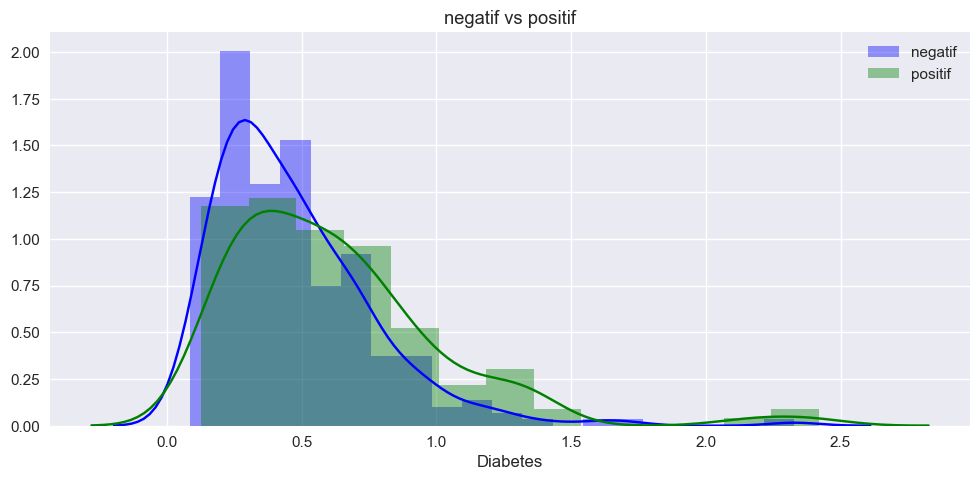

In [56]:
f,ax=plt.subplots(figsize=(10,5))
sns.distplot(pima[pima['test']=='negatif'].diabetes,ax=ax, color= 'blue', label='negatif')
sns.distplot(pima[pima['test']=='positif'].diabetes,ax=ax, color='green', label='positif')
ax.set_title('negatif vs positif')
ax.set_xlabel('Diabetes')
ax.legend()
plt.tight_layout()   
plt.show()

Interestingly, distribution seems similar for family history of diabetes between `positif` and `negatif` group. 

◘ Converting Diabetes into categories might give us some insights. 

In [57]:
pima['diabetes_group']=pd.qcut(pima['diabetes'], 3, labels=['1', '2', '3'])                            
print(pima['diabetes_group'].value_counts(sort=False))
pd.crosstab(pima['diabetes_group'], pima['test'], normalize=True).round(3).style.background_gradient(cmap='summer_r')

1    131
2    131
3    130
Name: diabetes_group, dtype: int64


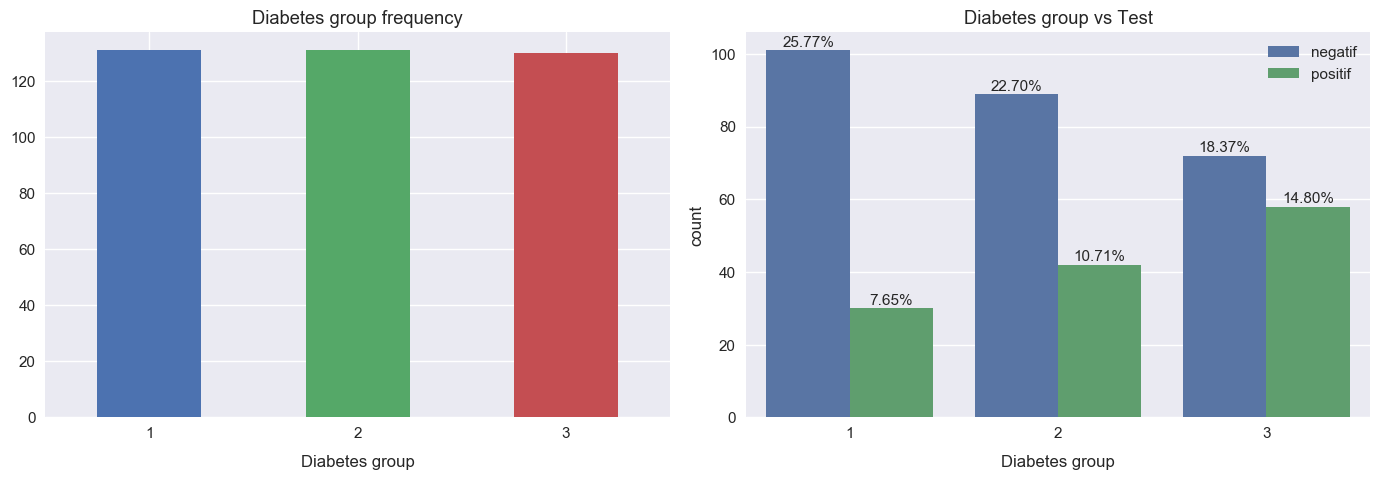

In [58]:
f,ax=plt.subplots(1,2,figsize=(14,5))
pima['diabetes_group'].value_counts(sort=False).plot.bar(ax=ax[0])
ax[0].set_xlabel('Diabetes group', labelpad = 10)
ax[0].set_xticklabels(['1', '2', '3', '4'], rotation = 0)
ax[0].set_title('Diabetes group frequency')

sns.countplot('diabetes_group',hue='test',data=pima,ax=ax[1])
ax[1].set_title('Diabetes group vs Test')
ax[1].set_xlabel('Diabetes group', labelpad = 10)
ax[1].legend(loc='1')
total = float(len(pima))
for p in ax[1].patches:
    height = p.get_height()
    ax[1].text(p.get_x()+p.get_width()/2.,
            height + 1,
            '{:1.2f}%'.format((height/total)*100),
            ha="center", size=11) 
plt.tight_layout()   
plt.show()

**Observation:** <br/> 
→ Ratio of `positif`:`negatif` increases from **0.29** to **0.47** to **0.8** with increase in family history of diabetes. This suggests role of genetics in the manifestation of diabetes.

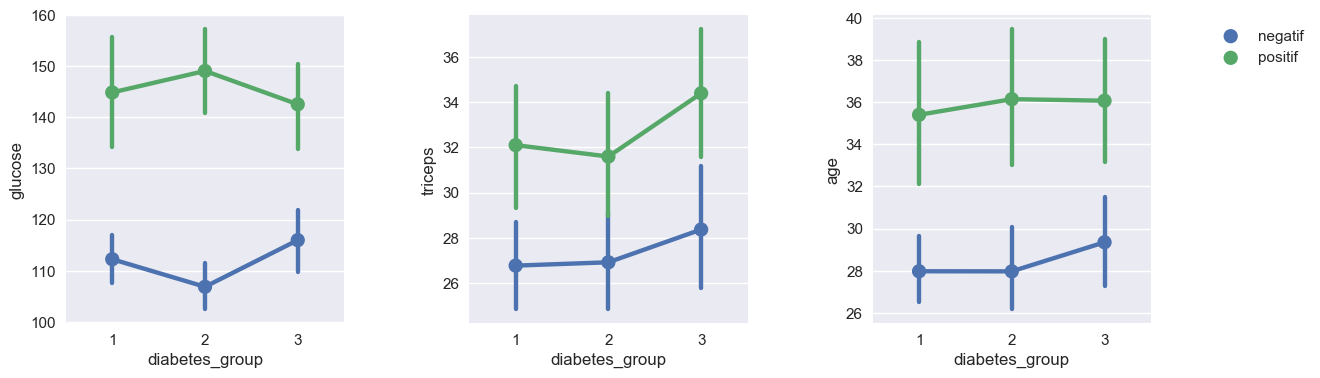

In [59]:
f,ax=plt.subplots(1,3,figsize=(14,4), gridspec_kw={'wspace': 0.45, 'hspace': 0.45})
sns.pointplot('diabetes_group', 'glucose',hue='test', data=pima, ax=ax[0])
ax[0].legend_.remove()
sns.pointplot('diabetes_group', 'triceps',hue='test', data=pima, ax=ax[1])
ax[1].legend_.remove()
sns.pointplot('diabetes_group', 'age',hue='test', data=pima, ax=ax[2])
ax[2].legend(loc=0, bbox_to_anchor=(1.6,1))
plt.tight_layout()
plt.show()

**Observation:** <br/> 
→ As expected irrespective of family history of diabetes, `positif` group will have higher amount of glucose than their counterpart. So although binning helped to get insights we might proceed with the continuous variable for target modeling.<br/> → Similar trend is seen with age (as we have already noticed `positif` group has a higher mean age)

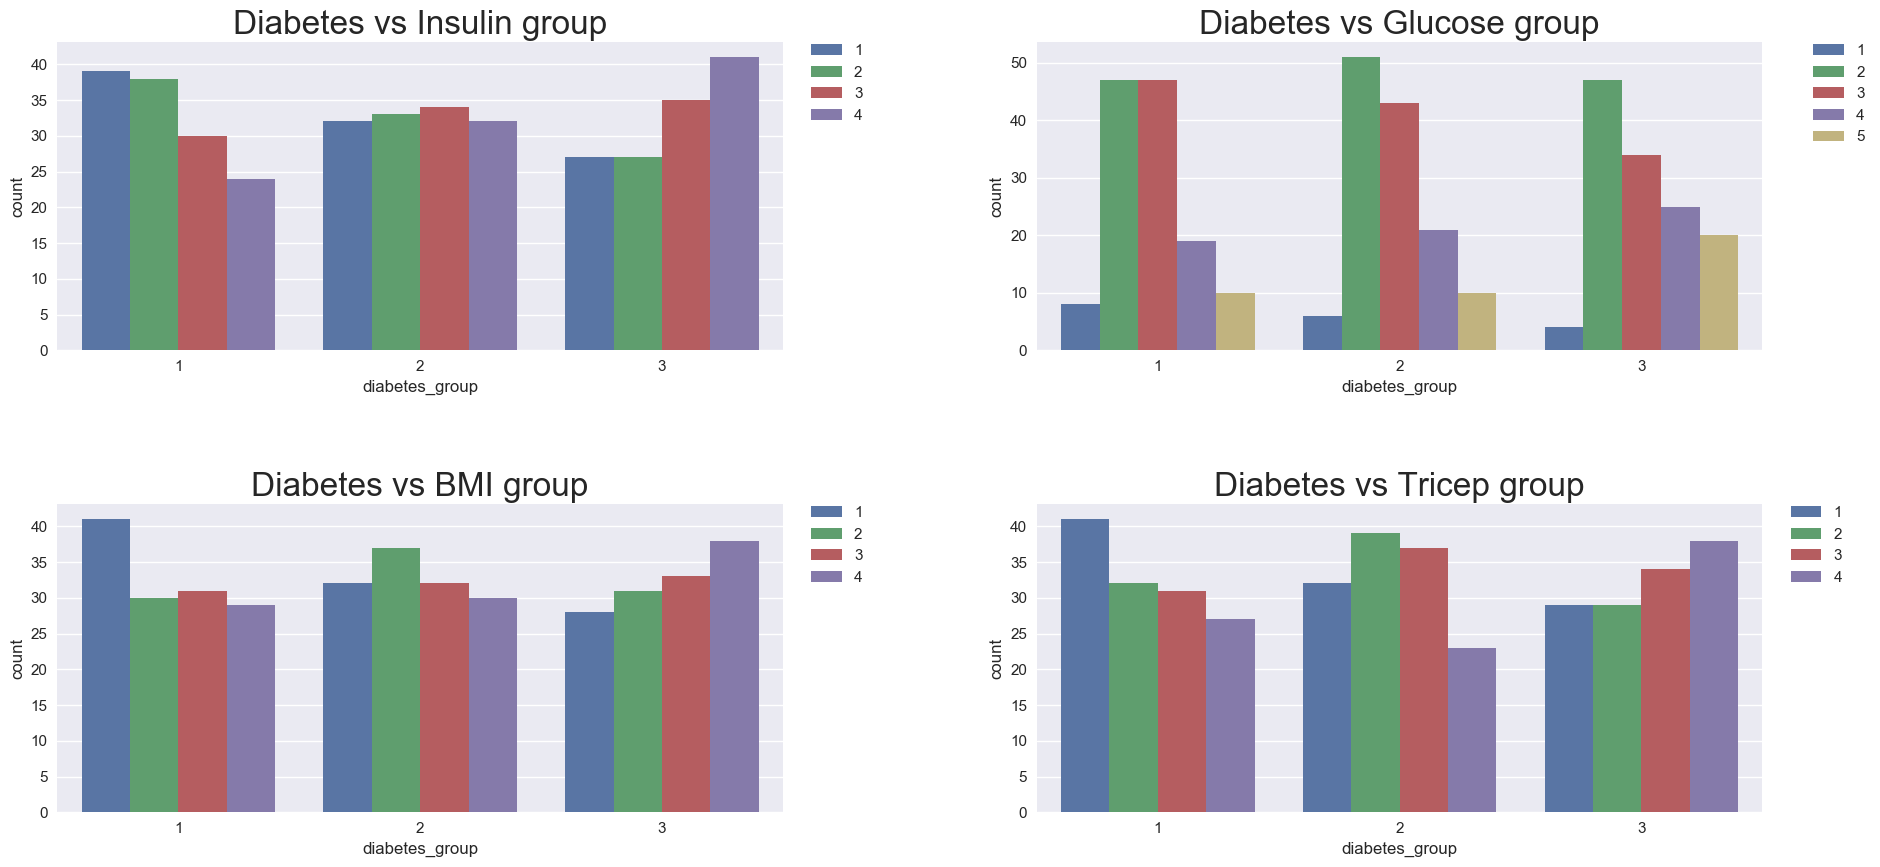

In [60]:
f,ax=plt.subplots(2,2,figsize=(22,10), gridspec_kw={'wspace': 0.35, 'hspace': 0.50})
sns.countplot('diabetes_group',hue='insulin_group',data=pima,ax=ax[0,0])
ax[0,0].set_title('Diabetes vs Insulin group', size=24)
ax[0,0].legend(loc=0, bbox_to_anchor=(1.02,1.04))
sns.countplot('diabetes_group',hue='glucose_group_N',data=pima,ax=ax[0,1])
ax[0,1].set_title('Diabetes vs Glucose group', size=24)
ax[0,1].legend(loc=1, bbox_to_anchor=(1.16,1.04))
sns.countplot('diabetes_group',hue='bmi_group',data=pima,ax=ax[1,0])
ax[1,0].set_title('Diabetes vs BMI group', size=24)
ax[1,0].legend(loc=0, bbox_to_anchor=(1.02,1.04))
sns.countplot('diabetes_group',hue='triceps_group',data=pima,ax=ax[1,1])
ax[1,1].set_title('Diabetes vs Tricep group', size=24)
ax[1,1].legend(loc=0, bbox_to_anchor=(1.02,1.04))
plt.tight_layout()
plt.show()

In [61]:
pima.groupby(['test','diabetes_group']).agg({'glucose': 'mean', 'diastolic': 'mean', 'triceps': 'mean',
'insulin': 'mean', 'bmi':'mean', 'age':'mean'}).round(2).style.background_gradient(cmap='summer_r')

→ Average value of most of the continuous features increases in`positif` w.r.t. `negatif` as strong history of manifesting diabetes increases 

### Age ► continuous feature
From the exploration of the data, age has an impact on several continuous features. Let's explore it further<br/>
♦ **Hypothesis:** From the exploration of the data, we can assume `positif` group has a higher mean age than their counterpart

In [62]:
print('Olderst individual:',pima['age'].max())
print('Youngest individual:',pima['age'].min())
print('Average age:',round(pima['age'].mean(),2))
pima.groupby('test').agg({'age':'mean'}).style.background_gradient(cmap='summer_r')

Olderst individual: 81
Youngest individual: 21
Average age: 30.86


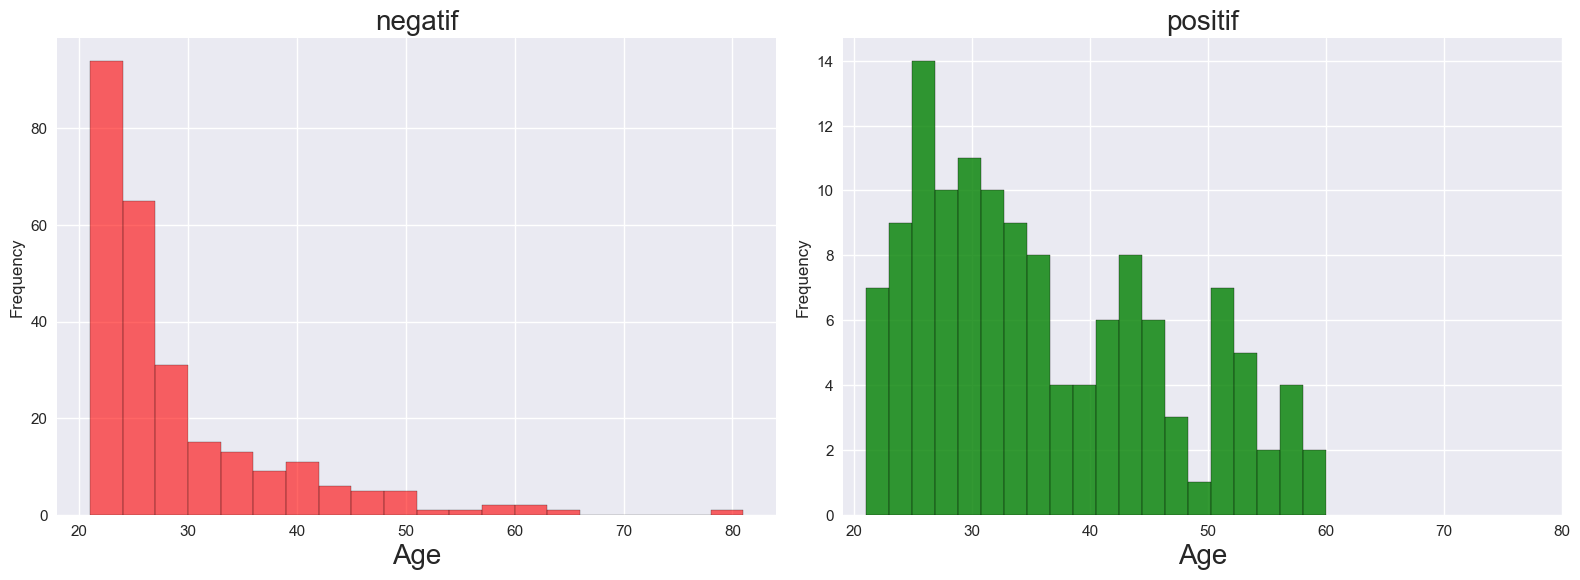

In [63]:
f,ax=plt.subplots(1,2,figsize=(16,6))
pima[pima['test']=='negatif'].age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red', alpha=0.6)
ax[0].set_title('negatif', size=20)
ax[0].set_xlabel('Age', size=20)
x1=list(range(20,85,10))
ax[0].set_xticks(x1)

pima[pima['test']=='positif'].age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black', alpha=0.8)
ax[1].set_title('positif', size=20)
ax[1].set_xlabel('Age', size=20)
x2=list(range(20,85,10))
ax[1].set_xticks(x2)
plt.tight_layout()   
plt.show()

Most of the `negatif` group has younger people. `positif` group contains individuals more evenly distributed over a wide age range. <br/>
◘ Let's explore this column more profoundly

In [64]:
pima['age_group']=pd.qcut(pima['age'], 3, labels=['1', '2', '3'])                            
print(pima['age_group'].value_counts(sort=False))
pd.crosstab(pima['age_group'], pima['test'], normalize=True).round(3).style.background_gradient(cmap='summer_r')

1    135
2    131
3    126
Name: age_group, dtype: int64


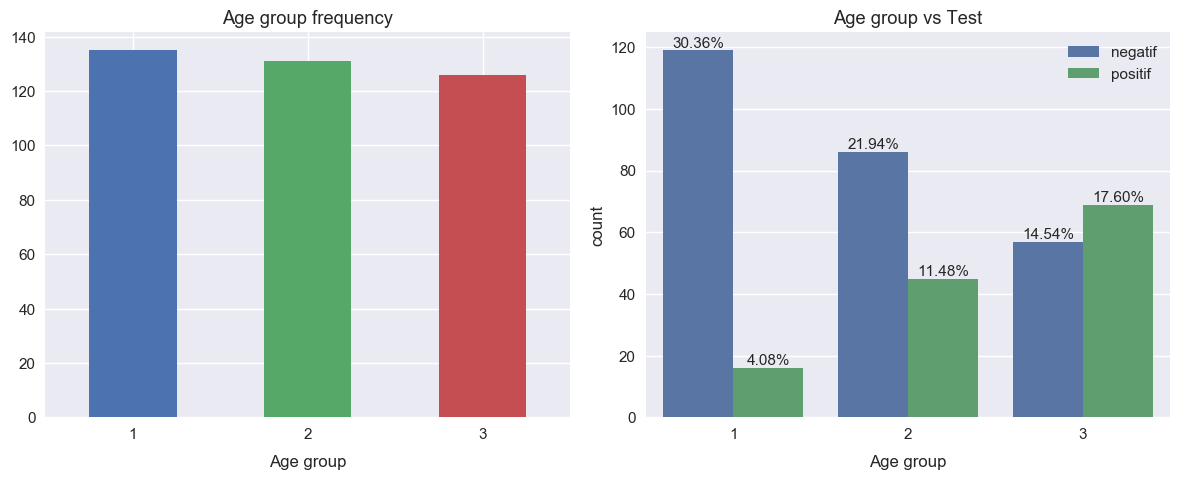

In [65]:
f,ax=plt.subplots(1,2,figsize=(12,5))
pima['age_group'].value_counts(sort=False).plot.bar(ax=ax[0])
ax[0].set_xlabel('Age group', labelpad = 10)
ax[0].set_xticklabels(['1', '2', '3', '4'], rotation = 0)
ax[0].set_title('Age group frequency')

sns.countplot('age_group',hue='test',data=pima,ax=ax[1])
ax[1].set_title('Age group vs Test')
ax[1].set_xlabel('Age group', labelpad = 10)
ax[1].legend(loc='1')
total = float(len(pima))
for p in ax[1].patches:
    height = p.get_height()
    ax[1].text(p.get_x()+p.get_width()/2.,
            height + 1,
            '{:1.2f}%'.format((height/total)*100),
            ha="center", size=11) 
plt.tight_layout()   
plt.show()

**Observation:** <br/>
→ Ratio of `positif`:`negatif` increases from **0.13** to **0.5** to as high as **1.21** as age group increases. This aligns well with initial hypothesis.

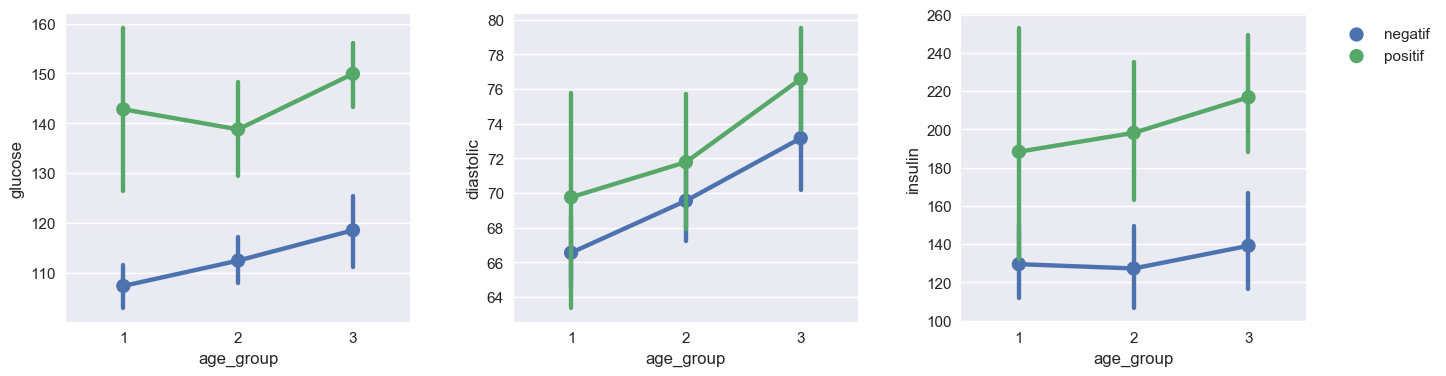

In [66]:
f,ax=plt.subplots(1,3,figsize=(16,4), gridspec_kw={'wspace': 0.3, 'hspace': 0.45})

sns.pointplot('age_group', 'glucose',hue='test', data=pima, ax=ax[0])
ax[0].legend_.remove()
sns.pointplot('age_group', 'diastolic',hue='test', data=pima, ax=ax[1])
ax[1].legend_.remove()
sns.pointplot('age_group', 'insulin',hue='test', data=pima, ax=ax[2])
ax[2].legend(loc=0, bbox_to_anchor=(1.4,1))
plt.tight_layout()
plt.show()

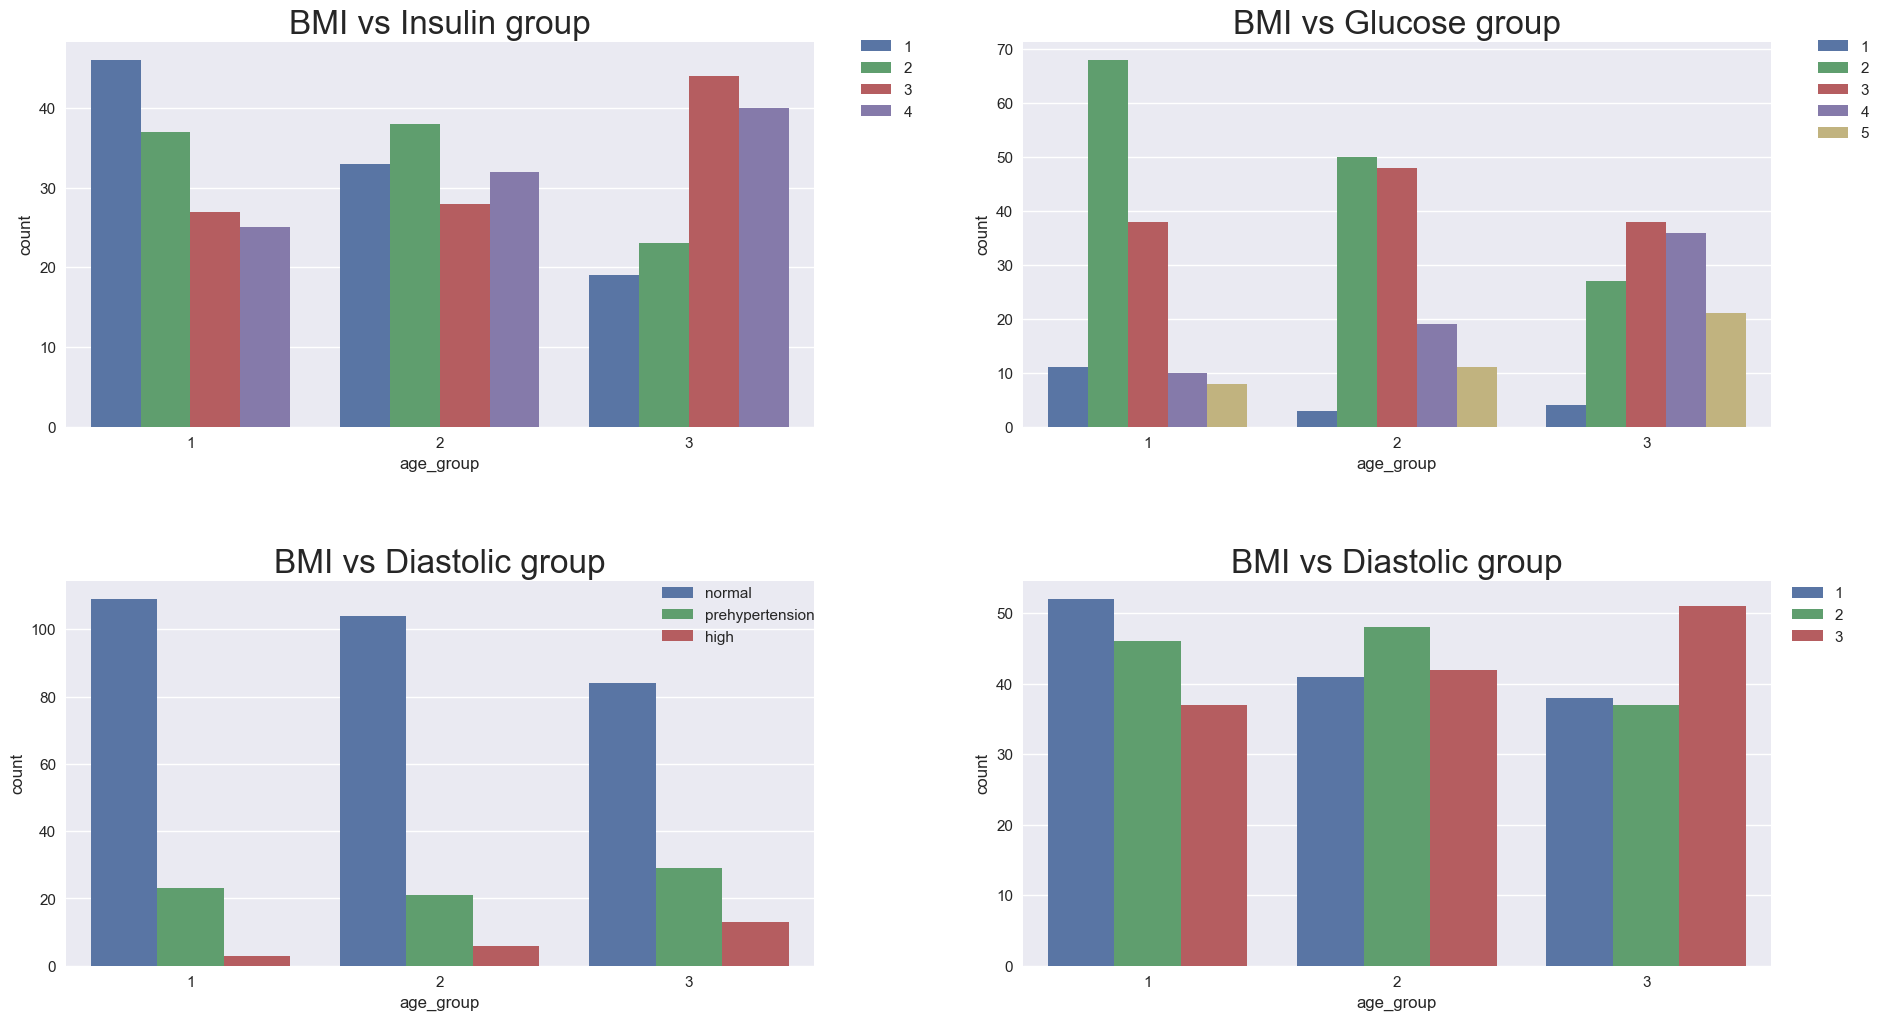

In [67]:
f,ax=plt.subplots(2,2,figsize=(22,12), gridspec_kw={'wspace': 0.28, 'hspace': 0.40})

sns.countplot('age_group',hue='insulin_group',data=pima,ax=ax[0,0])
ax[0,0].set_title('BMI vs Insulin group', size=24)
ax[0,0].legend(loc=0, bbox_to_anchor=(1.15,1.04))

sns.countplot('age_group',hue='glucose_group_N',data=pima,ax=ax[0,1])
ax[0,1].set_title('BMI vs Glucose group', size=24)
ax[0,1].legend(loc=0, bbox_to_anchor=(1.15,1.04))

sns.countplot('age_group',hue='diastolic_group',data=pima,ax=ax[1,0])
ax[1,0].set_title('BMI vs Diastolic group', size=24)
ax[1,0].legend(loc=1, bbox_to_anchor=(1.02,1.02))

sns.countplot('age_group',hue='diabetes_group',data=pima,ax=ax[1,1])
ax[1,1].set_title('BMI vs Diastolic group', size=24)
ax[1,1].legend(loc=0, bbox_to_anchor=(1.01,1.02))


plt.tight_layout()
plt.show()

In [68]:
pima.groupby(['test','age_group']).agg({'glucose': 'mean', 'diastolic': 'mean', 'triceps': 'mean',
'insulin': 'mean', 'bmi':'mean', 'diabetes':'mean'}).round(2).style.background_gradient(cmap='summer_r')

→ As age group increases diastolic blood pressure increases in both test group. Thus, we can interpret this increase in blood pressure is due to aging. <br/>
→ However we see a huge difference in glucose level although value increases for both test group. This might be because of both combined effect of diabetes and aging. <br/>
→ Insulin level increases more rapidly in `positif` group as one ages w.r.t. its counterpart and thus it might have a direct relationship with diabetes.

## Observations in a Nutshell for all features:
■ **Pregnant:** Rate of pregnancy is higher in `positif` w.r.t.`negatif`. Chance of being in the `positif` group for women with more than 6 pregnancies is higher as compared to women with 6 or less pregnancies.

■ **Glucose:** Individuals with glucose level >130 has a higher chance to be in `positif`.

■ **Diastolic** Individuals with high blood pressure has a higher chance to show signs of diabetes.

■ **Triceps** Chance of being part of `positif` group increases with higher body fat as this feature is related to glucose and **BMI** .

■ **Insulin** Interestingly higher insulin will lead to higher chance for `positif` group irrespective of the general notion.

■ **Diabetes** This genetic feature is positively correlated with manifestation of diabetes.

■ **Age** `positif` group age is distributed more uniformly than `negatif` (higher occurrence of younger people here)  

<a id='loade'><a/>
## **1.E. Deciphering insightful trends between features**

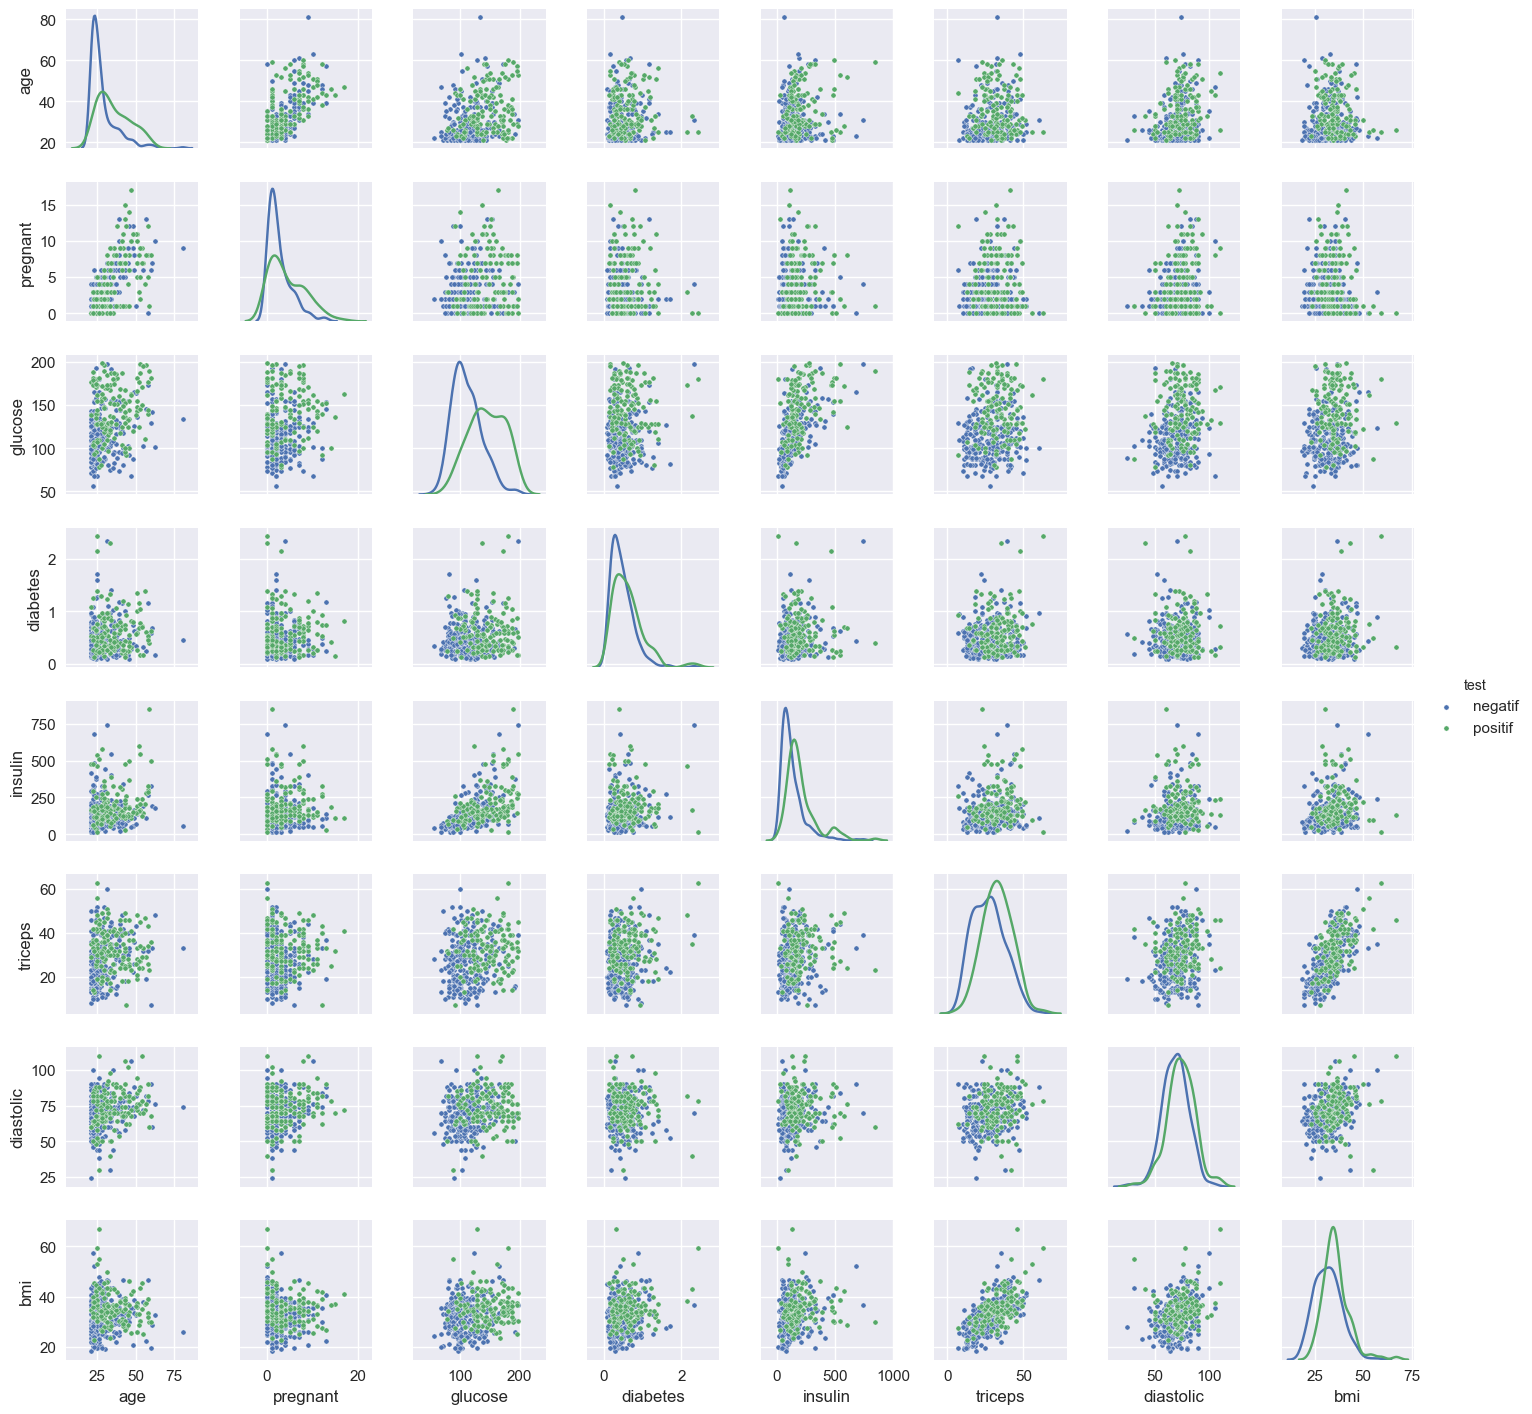

In [69]:
sns.pairplot(pima, diag_kind='kde', 
             vars=['age', 'pregnant', 'glucose', 'diabetes', 'insulin', 'triceps', 'diastolic', 'bmi'],
            hue = 'test',
            plot_kws = {'s':14}, size=1.8)

→ Pairplot gives a more detailed visualization of relationships between continuous variables. It shows scatter plots for the different features as well as distribution of each feature on the diagonal. <br/>
→ Distribution of `negatif` and `positif` is most varied in glucose feature.

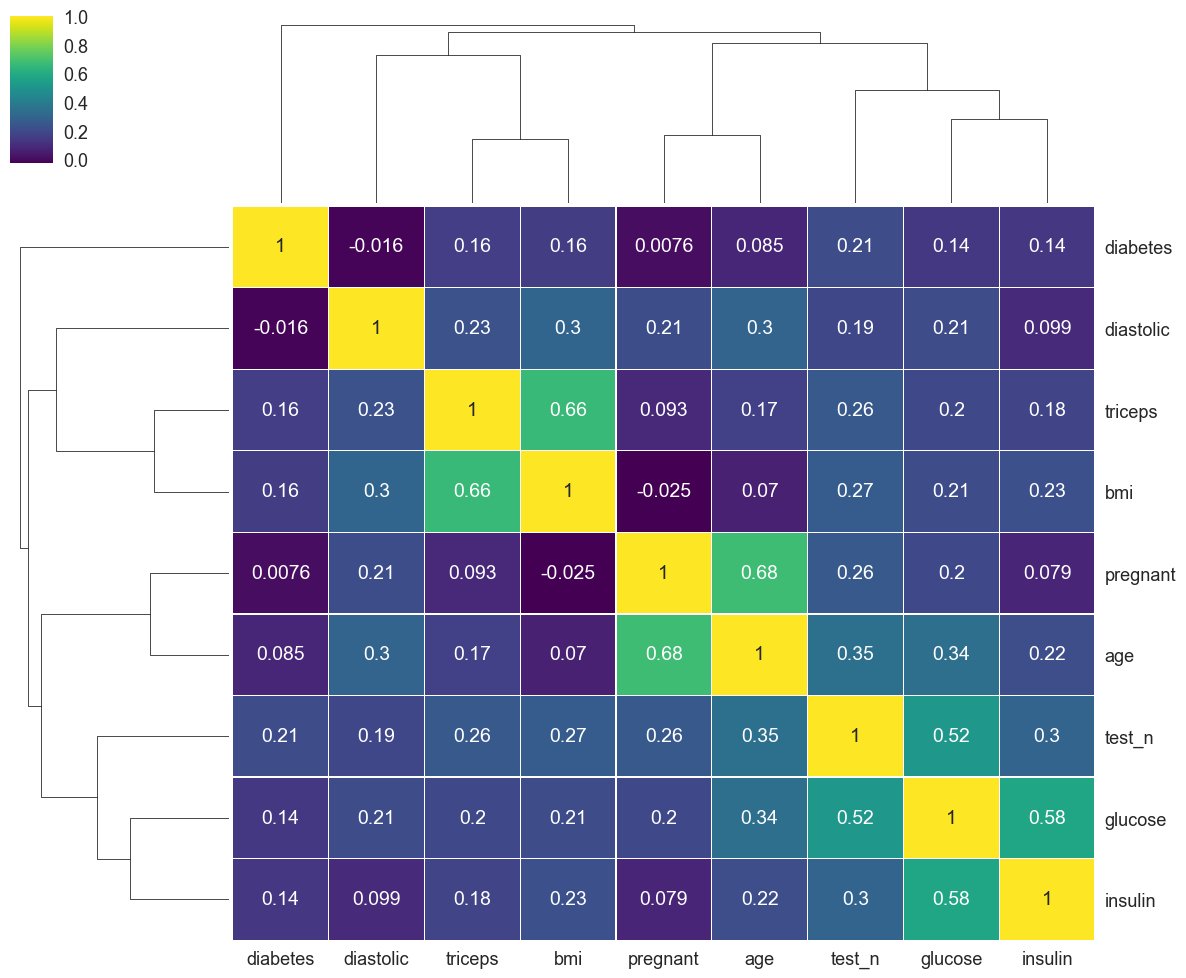

In [70]:
# conversion of target to numeric value will allow correlating with other features
pima_x = pima
pima_x['test_n']=pima_x['test'].map({'positif':1, 'negatif':0})
sns.set(font_scale=1.3)
g=sns.clustermap(pima_x.corr(),annot=True, cmap='viridis', linewidths=0.2,annot_kws={'size':14}) 
fig=plt.gcf()
fig.set_size_inches(14,12)
plt.xticks(fontsize=14)
plt.show()

→ If an increase in one feature leads to an increase in another feature, i.e. referred as positive correlation. Similarly, a decrease will lead to a negative correlation. A perfect positive correlation will get a score of 1 whereas a perfect negative correlation will lead to -1.

→ As a feature is perfectly correlated to itself, it will lead to a yellow diagonal or perfect correlation. 

→ From the matrix we get insight of which features are particularly important for our analysis. Both strongly positive or negative correlations with the target feature are valuable. From the plot, glucose variable seems to have highest correlation with the target. Additionally that seemed to be the case even in EDA. **Thus, glucose is most likely going to be the strongest predictor of the target.**

→ However, strong correlations between two features would mean they contain very similar information and thus there is little variance. This leads to multicolinearity. Elimination of such redundant features is essential for reducing noise and preventing chance of over-fitting.

<a id='derived'><a/>
# **2. Feature engineering and Data cleaning**

<a id='derivedA'><a/>
## **2.A. Outlier detection**

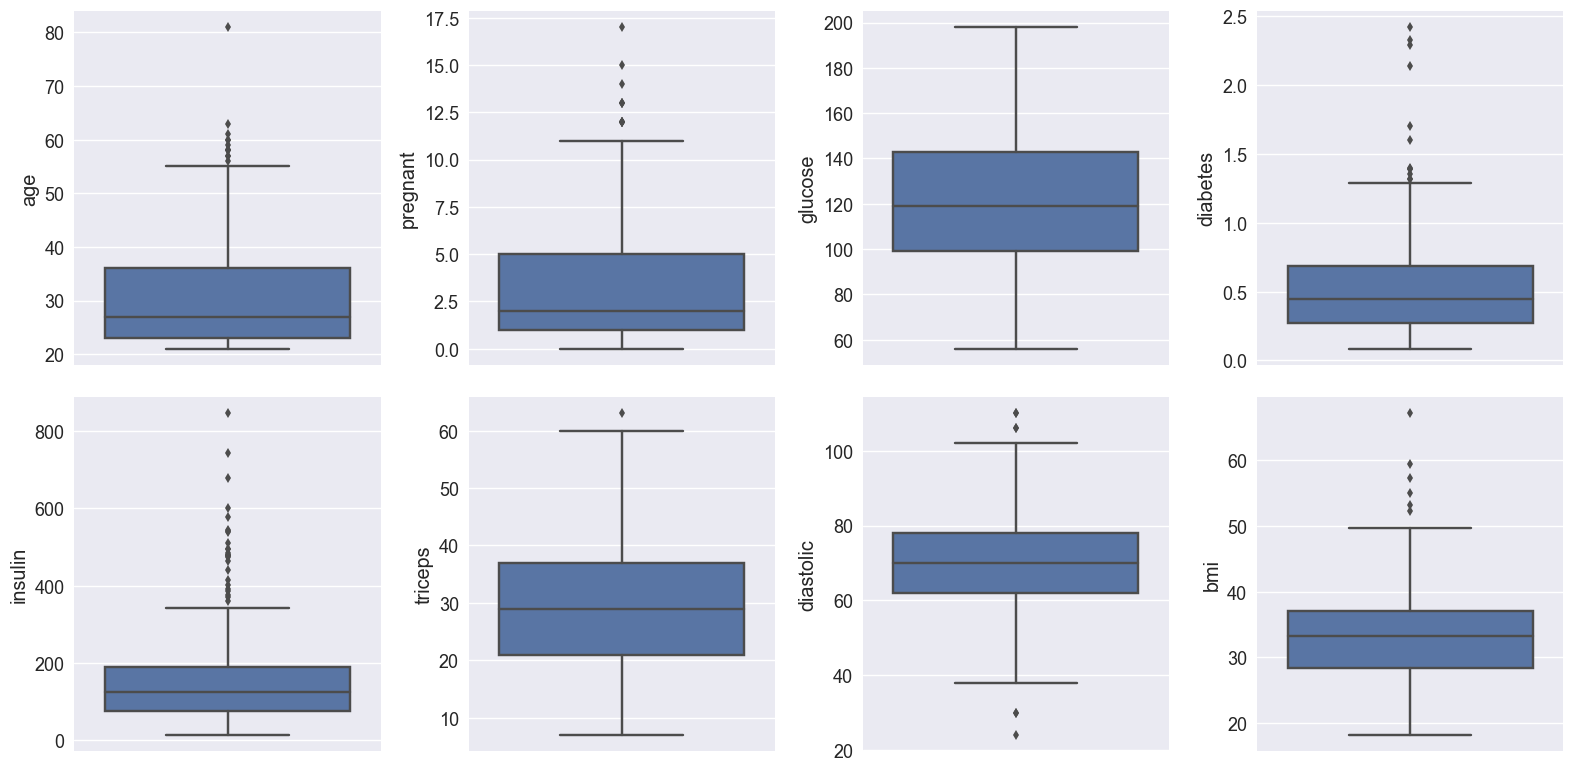

In [71]:
fig, axes = plt.subplots(2,4, figsize = (16,8), sharex=False, sharey=False)
sns.boxplot(y='age',data=pima, ax=axes[0,0])
sns.boxplot(y='pregnant',data=pima, ax=axes[0,1])
sns.boxplot(y='glucose',data=pima, ax=axes[0,2])
sns.boxplot(y='diabetes',data=pima, ax=axes[0,3])
sns.boxplot(y='insulin',data=pima, ax=axes[1,0])
sns.boxplot(y='triceps',data=pima, ax=axes[1,1])
sns.boxplot(y='diastolic',data=pima, ax=axes[1,2])
sns.boxplot(y='bmi',data=pima, ax=axes[1,3])
plt.tight_layout()

In [72]:
filt = (pima['triceps']>60) & (pima['diabetes']>2.4) & (pima['bmi']>55)
pima[filt].index

Int64Index([225], dtype='int64')

→ The observation at index 225 is an outlier and we can confirm this by the following function (courtesy-Yassine)

In [73]:
def detect_outliers(df,n,features):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than n outliers according
    to the Tukey method.
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

# detect outliers from Age, SibSp , Parch and Fare
Outliers_to_drop = detect_outliers(pima,2,['pregnant', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi',
       'diabetes', 'age'])
pima.loc[Outliers_to_drop]

pregnant  glucose  diastolic  triceps  insulin   bmi  diabetes  age  \
225         0      180         78       63       14  59.4      2.42   25   

        test pregnency_group glucose_group glucose_group_N diastolic_group  \
225  positif               1   prediabetes               5          normal   

    triceps_group insulin_group bmi_group diabetes_group age_group  test_n  
225             4             1         4              3         2       1

Interestingly removing the outlier reduces the accuracy of prediction by ~5%. Therefore, not removing the outlier.

<a id='derivedB'><a/>
## **2.B. Converting String Values into Numeric**

Since we cannot pass strings to a machine learning model, we need to convert features like glucose group. diastolic group into numeric values.

In [74]:
pima['glucose_group'].replace(['normal', 'prediabetes', 'diabetes'], [0,1,2], inplace=True)
pima['diastolic_group'].replace(['normal', 'prehypertension', 'high'], [0,1,2], inplace=True)

■ Let's make 3 input sets for ML. <br/>
→ **pima1** will represent original data. <br/> 
→ **pima2** will reprsent all the enginnered data (categorical columns made from continuous features) <br/>
→ **pima3** will represent combinations of columns that shows highest correlation with target feature

In [75]:
pima1 = pima.drop(['pregnency_group', 'glucose_group',
       'glucose_group_N', 'diastolic_group', 'triceps_group', 'insulin_group',
       'bmi_group', 'diabetes_group', 'age_group'],axis=1)
pima2 = pima.drop(['pregnant', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi',
       'diabetes', 'age'],axis=1)
pima2.dtypes

test                 object
pregnency_group    category
glucose_group         int64
glucose_group_N    category
diastolic_group       int64
triceps_group      category
insulin_group      category
bmi_group          category
diabetes_group     category
age_group          category
test_n                int64
dtype: object

In [76]:
# convert categorical columns into numericals
cols = ['pregnency_group', 'glucose_group_N', 'triceps_group', 'insulin_group',
       'bmi_group', 'diabetes_group', 'age_group']
pima2[cols] = pima2[cols].apply(pd.to_numeric,errors='ignore')
pima2.dtypes

test               object
pregnency_group     int64
glucose_group       int64
glucose_group_N     int64
diastolic_group     int64
triceps_group       int64
insulin_group       int64
bmi_group           int64
diabetes_group      int64
age_group           int64
test_n              int64
dtype: object

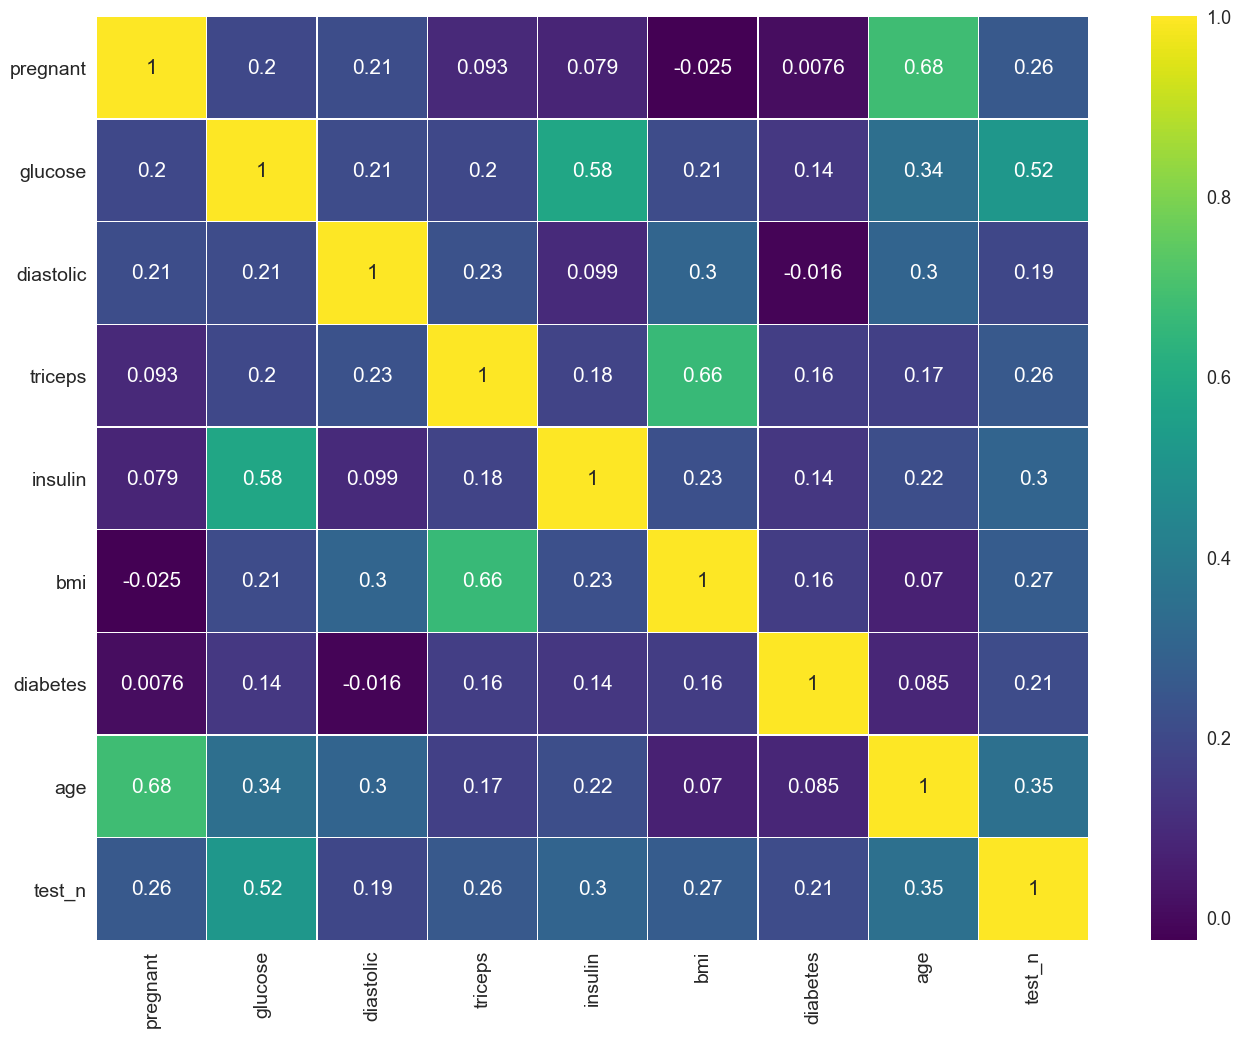

In [77]:
sns.heatmap(pima1.corr(),annot=True,cmap='viridis',linewidths=0.2,annot_kws={'size':15})
fig=plt.gcf()
fig.set_size_inches(16,12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

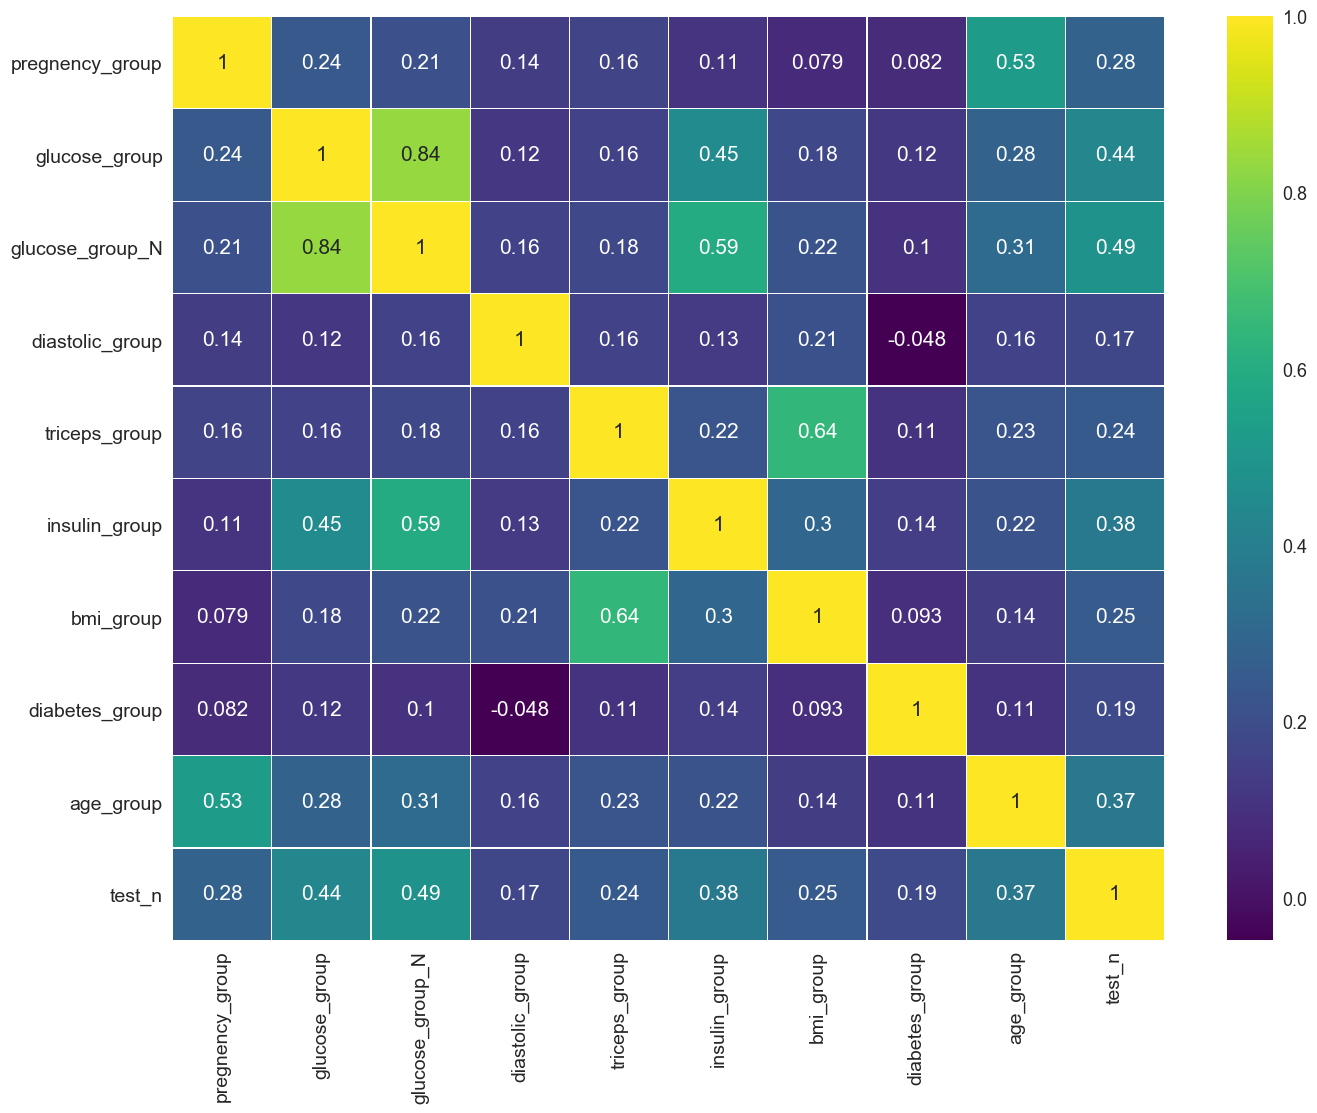

In [78]:
sns.heatmap(pima2.corr(),annot=True,cmap='viridis',linewidths=0.2,annot_kws={'size':15})
fig=plt.gcf()
fig.set_size_inches(16,12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [79]:
# glucose_group is dropped as glucose_group_N has higher correlation with target
pima2 = pima2[pima2.columns.drop(['glucose_group'])]
pima2.columns

Index(['test', 'pregnency_group', 'glucose_group_N', 'diastolic_group',
       'triceps_group', 'insulin_group', 'bmi_group', 'diabetes_group',
       'age_group', 'test_n'],
      dtype='object')

→ Although we see very minor variation in correlation between the continuous features and the engineered categoricals from them with the target, it might be interesting to see what would be the impact on ML prediction accuracy. Based on the correlation score we chose **pregnancy_group, insulin_group, and age_group** as categoricals in pima3.

In [80]:
pima3 = pima[['pregnency_group','glucose', 'diastolic','triceps','insulin_group', 'bmi', 'diabetes', 'age_group','test']]

<a id='derivedC'><a/>
## **2.C. Converting features into suitable form for modeling**

In [81]:
pima2 = pd.get_dummies(pima2, columns = ["pregnency_group"])
pima2 = pd.get_dummies(pima2, columns = ["glucose_group_N"])
pima2 = pd.get_dummies(pima2, columns = ["diastolic_group"])
pima2 = pd.get_dummies(pima2, columns = ["triceps_group"])
pima2 = pd.get_dummies(pima2, columns = ["insulin_group"])
pima2 = pd.get_dummies(pima2, columns = ["bmi_group"])
pima2 = pd.get_dummies(pima2, columns = ["diabetes_group"])
pima2 = pd.get_dummies(pima2, columns = ["age_group"])
pima3 = pd.get_dummies(pima3, columns = ["pregnency_group"])
pima3 = pd.get_dummies(pima3, columns = ["insulin_group"])
pima3 = pd.get_dummies(pima3, columns = ["age_group"])

In [82]:
pima1 = pima1[pima1.columns.drop(['test_n'])]
pima2 = pima2[pima2.columns.drop(['test_n'])]
pima1.shape, pima2.shape, pima3.shape

((392, 9), (392, 30), (392, 16))

<a id='mode'><a/>
# **3. Predictive Modeling**

<a id='modeA'><a/>
## **3.A. Running Basic Algorithms**

Insights from the EDA help us to gain insights on the data. However, based on that we can't predict whether someone will develop diabetes or not.  We will use different Classification Algorithms for predicting the target. Following are the algorithms that would be used to make the model:

■ Logistic Regression

■ Support Vector Machines(Linear and radial)

■ Decision Tree

■ K-Nearest Neighbors

■ Naive Bayes

■ Random Forest

In [83]:
#importing all the required ML packages
from sklearn.model_selection import train_test_split # training and testing data split
from sklearn.linear_model import LogisticRegression # logistic regression
from sklearn import svm # support vector Machine
from sklearn.neighbors import KNeighborsClassifier # K-NN
from sklearn.naive_bayes import GaussianNB # naive bayes
from sklearn.tree import DecisionTreeClassifier # decision Tree
from sklearn.ensemble import RandomForestClassifier # random Forest
from sklearn.ensemble import ExtraTreesClassifier, VotingClassifier
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix # confusion matrix

In [84]:
# pima1 split
X1 = pima1[['age', 'pregnant', 'glucose', 'diabetes', 'insulin', 'triceps',
       'diastolic', 'bmi']]
y1 = pima1['test']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.22, random_state = 0)

# pima2(only engineered features) split
X2 = pima2[['pregnency_group_1', 'pregnency_group_2', 'pregnency_group_3',
       'glucose_group_N_1', 'glucose_group_N_2', 'glucose_group_N_3',
       'glucose_group_N_4', 'glucose_group_N_5', 'diastolic_group_0',
       'diastolic_group_1', 'diastolic_group_2', 'triceps_group_1',
       'triceps_group_2', 'triceps_group_3', 'triceps_group_4',
       'insulin_group_1', 'insulin_group_2', 'insulin_group_3',
       'insulin_group_4', 'bmi_group_1', 'bmi_group_2', 'bmi_group_3',
       'bmi_group_4', 'diabetes_group_1', 'diabetes_group_2',
       'diabetes_group_3', 'age_group_1', 'age_group_2', 'age_group_3']]
y2 = pima2['test']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.22, random_state = 0)

# Mix of original and engineered data (pima3) split
X3 = pima3[['glucose', 'diastolic', 'triceps', 'bmi', 'diabetes',
       'pregnency_group_1', 'pregnency_group_2', 'pregnency_group_3',
       'insulin_group_1', 'insulin_group_2', 'insulin_group_3',
       'insulin_group_4', 'age_group_1', 'age_group_2', 'age_group_3']]
y3 = pima3['test']
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size = 0.22, random_state = 0)

print(X1.shape, y1.shape)
print(X2.shape, y2.shape)
print(X3.shape, y3.shape)

(392, 8) (392,)
(392, 29) (392,)
(392, 15) (392,)


In [85]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
gaussian = GaussianNB()
gaussian.fit(X_train1, y_train1)
acc_gaussian1 = round(gaussian.score(X_test1, y_test1) *100,2)
print('acc_gaussian(pima1) :',acc_gaussian1)

gaussian.fit(X_train2, y_train2)
acc_gaussian2 = round(gaussian.score(X_test2, y_test2) *100,2)
print('acc_gaussian(pima2) :',acc_gaussian2)

gaussian.fit(X_train3, y_train3)
acc_gaussian3 = round(gaussian.score(X_test3, y_test3) *100,2)
print('acc_gaussian(pima3) :',acc_gaussian3)

acc_gaussian(pima1) : 79.31
acc_gaussian(pima2) : 74.71
acc_gaussian(pima3) : 83.91


In [86]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train1, y_train1)
acc_logreg1 = round(logreg.score(X_test1, y_test1) *100,2)
print('acc_logreg(pima1) :',acc_logreg1)

logreg.fit(X_train2, y_train2)
acc_logreg2 = round(logreg.score(X_test2, y_test2) *100,2)
print('acc_logreg(pima2) :',acc_logreg2)

logreg.fit(X_train3, y_train3)
acc_logreg3 = round(logreg.score(X_test3, y_test3) *100,2)
print('acc_logreg(pima3) :',acc_logreg3)

acc_logreg(pima1) : 80.46
acc_logreg(pima2) : 80.46
acc_logreg(pima3) : 81.61


In [87]:
# Support Vector Machines
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train1, y_train1)
acc_svc1 = round(svc.score(X_test1, y_test1) *100,2)
print('acc_svc(pima1) :',acc_svc1)

svc.fit(X_train2, y_train2)
acc_svc2 = round(svc.score(X_test2, y_test2) *100,2)
print('acc_svc(pima2) :',acc_svc2)

svc.fit(X_train3, y_train3)
acc_svc3 = round(svc.score(X_test3, y_test3) *100,2)
print('acc_svc(pima3) :',acc_svc3)

acc_svc(pima1) : 67.82
acc_svc(pima2) : 77.01
acc_svc(pima3) : 68.97


In [88]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
decisiontree = DecisionTreeClassifier()
decisiontree.fit(X_train1, y_train1)
acc_decisiontree1 = round(decisiontree.score(X_test1, y_test1) *100,2)
print('acc_decisiontree(pima1) :',acc_decisiontree1)

decisiontree.fit(X_train2, y_train2)
acc_decisiontree2 = round(decisiontree.score(X_test2, y_test2) *100,2)
print('acc_decisiontree(pima2) :',acc_decisiontree2)

decisiontree.fit(X_train3, y_train3)
acc_decisiontree3 = round(decisiontree.score(X_test3, y_test3) *100,2)
print('acc_decisiontree(pima3) :',acc_decisiontree3)

acc_decisiontree(pima1) : 78.16
acc_decisiontree(pima2) : 71.26
acc_decisiontree(pima3) : 74.71


In [89]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier(n_estimators=10)
randomforest.fit(X_train1, y_train1)
acc_randomforest1 = round(randomforest.score(X_test1, y_test1) *100,2)
print('acc_decisiontree(pima1) :',acc_randomforest1)

randomforest.fit(X_train2, y_train2)
acc_randomforest2 = round(randomforest.score(X_test2, y_test2) *100,2)
print('acc_decisiontree(pima2) :',acc_randomforest2)

randomforest.fit(X_train3, y_train3)
acc_randomforest3 = round(randomforest.score(X_test3, y_test3) *100,2)
print('acc_decisiontree(pima3) :',acc_randomforest3)

acc_decisiontree(pima1) : 80.46
acc_decisiontree(pima2) : 74.71
acc_decisiontree(pima3) : 78.16


In [90]:
# Extra Tree
from sklearn.ensemble import ExtraTreesClassifier
extraTrees = ExtraTreesClassifier(n_estimators=10)
extraTrees.fit(X_train1, y_train1)
acc_extraTrees1 = round(extraTrees.score(X_test1, y_test1) *100,2)
print('acc_decisiontree(pima1) :',acc_extraTrees1)

extraTrees.fit(X_train2, y_train2)
acc_extraTrees2 = round(extraTrees.score(X_test2, y_test2) *100,2)
print('acc_decisiontree(pima2) :',acc_extraTrees2)

extraTrees.fit(X_train3, y_train3)
acc_extraTrees3 = round(extraTrees.score(X_test3, y_test3) *100,2)
print('acc_decisiontree(pima3) :',acc_extraTrees3)

acc_decisiontree(pima1) : 79.31
acc_decisiontree(pima2) : 79.31
acc_decisiontree(pima3) : 75.86


In [91]:
# KNN or k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train1, y_train1)
acc_knn1 = round(knn.score(X_test1, y_test1) *100,2)
print('acc_knn(pima1) :',acc_knn1)

knn.fit(X_train2, y_train2)
acc_knn2 = round(knn.score(X_test2, y_test2) *100,2)
print('acc_knn(pima2) :',acc_knn2)

knn.fit(X_train3, y_train3)
acc_knn3 = round(knn.score(X_test3, y_test3) *100,2)
print('acc_knn(pima3) :',acc_knn3)

acc_knn(pima1) : 77.01
acc_knn(pima2) : 83.91
acc_knn(pima3) : 75.86


In [92]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
gbk = GradientBoostingClassifier()
gbk.fit(X_train1, y_train1)
acc_gbk1 = round(gbk.score(X_test1, y_test1) *100,2)
print('acc_gbk(pima1) :',acc_gbk1)

gbk.fit(X_train2, y_train2)
acc_gbk2 = round(gbk.score(X_test2, y_test2) *100,2)
print('acc_gbk(pima2) :',acc_gbk2)

gbk.fit(X_train3, y_train3)
acc_gbk3 = round(gbk.score(X_test3, y_test3) *100,2)
print('acc_gbk(pima3) :',acc_gbk3)

acc_gbk(pima1) : 79.31
acc_gbk(pima2) : 80.46
acc_gbk(pima3) : 75.86


In [93]:
# Let's compare the accuracies of each model
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Decision Tree', 'Extra Tree', 'Gradient Boosting Classifier'],
    'Score_pima1': [acc_svc1, acc_knn1, acc_logreg1, 
              acc_randomforest1, acc_gaussian1, acc_decisiontree1,
              acc_gbk1, acc_extraTrees1],
    'Score_pima2': [acc_svc2, acc_knn2, acc_logreg2, 
              acc_randomforest2, acc_gaussian2, acc_decisiontree2,
              acc_gbk2, acc_extraTrees2],
    'Score_pima3': [acc_svc3, acc_knn3, acc_logreg3, 
              acc_randomforest3, acc_gaussian3, acc_decisiontree3,
              acc_gbk3, acc_extraTrees3]})
models=models.sort_values(by='Score_pima1', ascending=False)
models['mean'] = models.mean(axis=1).round(2)
models.set_index('Model', inplace=True)
models.loc['avg'] = models.mean()
models

Score_pima1  Score_pima2  Score_pima3     mean
Model                                                                       
Logistic Regression                 80.46     80.46000      81.6100  80.8400
Random Forest                       80.46     74.71000      78.1600  77.7800
Naive Bayes                         79.31     74.71000      83.9100  79.3100
Extra Tree                          79.31     80.46000      75.8600  78.5400
Gradient Boosting Classifier        79.31     79.31000      75.8600  78.1600
Decision Tree                       78.16     71.26000      74.7100  74.7100
KNN                                 77.01     83.91000      75.8600  78.9300
Support Vector Machines             67.82     77.01000      68.9700  71.2700
avg                                 77.73     77.72875      76.8675  77.4425

→ After running several classification algorithm we see all the inputs behave similarly. Moving forward, **we will use only pima1 or original dataset as others does not give a huge edge.** Given Random forest is a stable algorithm (lot of resampling make it less prone to be biased by outliers or some unexpected test data), it looks like a good option to explore further. 

<a id='modeB'><a/>
## **3.B. StandardScaler **

→ As various features have different scales, normalizing them might improve the prediction. And thus it might be a good idea to use standardscaler

In [94]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train1 = sc.fit_transform(X_train1)
X_test1 = sc.transform(X_test1)

In [95]:
# Gaussian Naive Bayes_with standard scaler
gaussian = GaussianNB()
gaussian.fit(X_train1, y_train1)
acc_gaussian_s = round(gaussian.score(X_test1, y_test1) *100,2)
print('acc_gaussian(pima1) :',acc_gaussian_s)

# Logistic Regression_with standard scaler
logreg = LogisticRegression()
logreg.fit(X_train1, y_train1)
acc_logreg_s = round(logreg.score(X_test1, y_test1) *100,2)
print('acc_logreg(pima1) :',acc_logreg_s)

# Support Vector Machines
svc = SVC()
svc.fit(X_train1, y_train1)
acc_svc_s = round(svc.score(X_test1, y_test1) *100,2)
print('acc_svc(pima1) :',acc_svc_s)

#Decision Tree
decisiontree = DecisionTreeClassifier()
decisiontree.fit(X_train1, y_train1)
acc_decisiontree_s = round(decisiontree.score(X_test1, y_test1) *100,2)
print('acc_decisiontree(pima1) :',acc_decisiontree_s)

# Random Forest
randomforest = RandomForestClassifier(n_estimators=10)
randomforest.fit(X_train1, y_train1)
acc_randomforest_s = round(randomforest.score(X_test1, y_test1) *100,2)
print('acc_decisiontree(pima1) :',acc_randomforest_s)

# Extra Tree
extraTrees = ExtraTreesClassifier(n_estimators=10)
extraTrees.fit(X_train1, y_train1)
acc_extraTrees_s = round(extraTrees.score(X_test1, y_test1) *100,2)
print('acc_decisiontree(pima1) :',acc_extraTrees_s)

# KNN or k-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train1, y_train1)
acc_knn_s = round(knn.score(X_test1, y_test1) *100,2)
print('acc_knn(pima1) :',acc_knn_s)

# Gradient Boosting Classifier
gbk = GradientBoostingClassifier()
gbk.fit(X_train1, y_train1)
acc_gbk_s = round(gbk.score(X_test1, y_test1) *100,2)
print('acc_gbk(pima1) :',acc_gbk_s)

# Let's compare the accuracies of each model

models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Decision Tree', 'Extra Tree', 'Gradient Boosting Classifier'],
    'Score_pima1': [acc_svc1, acc_knn1, acc_logreg1, 
              acc_randomforest1, acc_gaussian1, acc_decisiontree1,
              acc_gbk1, acc_extraTrees1],    
    'Standard_scaler-score_pima1': [acc_svc_s, acc_knn_s, acc_logreg_s, 
              acc_randomforest_s, acc_gaussian_s, acc_decisiontree_s,
              acc_gbk_s, acc_extraTrees_s]})
models=models.sort_values(by='Standard_scaler-score_pima1', ascending=False)
models['mean'] = models.mean(axis=1).round(2)
models.set_index('Model', inplace=True)
models.loc['avg'] = models.mean()
models

acc_gaussian(pima1) : 79.31
acc_logreg(pima1) : 80.46
acc_svc(pima1) : 78.16
acc_decisiontree(pima1) : 80.46
acc_decisiontree(pima1) : 78.16
acc_decisiontree(pima1) : 77.01
acc_knn(pima1) : 78.16
acc_gbk(pima1) : 78.16


Score_pima1  Standard_scaler-score_pima1  \
Model                                                                    
Logistic Regression                 80.46                       80.460   
Decision Tree                       78.16                       80.460   
Naive Bayes                         79.31                       79.310   
Support Vector Machines             67.82                       78.160   
KNN                                 77.01                       78.160   
Random Forest                       80.46                       78.160   
Extra Tree                          79.31                       78.160   
Gradient Boosting Classifier        79.31                       77.010   
avg                                 77.73                       78.735   

                                  mean  
Model                                   
Logistic Regression           80.46000  
Decision Tree                 79.31000  
Naive Bayes                   79.31000  
Support Vector Machines       72.99000  
KNN                           77.59000  
Random Forest                 79.31000  
Extra Tree                    78.74000  
Gradient Boosting Classifier  78.16000  
avg                           78.23375

→ As standardizing pima1 improved accuracy a little bit, we will continue using this scaled data

<a id='modeC'><a/>
## **3.C. Cross Validation**

→ Although accuracy is a great way to understand how well the model is performing, it does not guarantee the same accuracy if next set of data has higher variance. To generalize the model better for a better overall performance, we need to do cross validation.

→ Cross Validation is also useful when there is a dataset imbalance.

→ Here we will perform K-Fold Cross Validation. We divide data into k parts. k-1 part is used to train the algorithm and 1 part is used as test set. We iterate through the process k times and this helps to scan the data better and achieve a more generalized model. 

In [96]:
#Applying Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X1 = sc.fit_transform(X1)

# pima1_cross-validation
from sklearn.model_selection import KFold # for K-fold cross validation
from sklearn.model_selection import cross_val_score # score evaluation
from sklearn.model_selection import cross_val_predict # prediction

kfold = KFold(n_splits=10, random_state=0) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]

classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest', 'Extra Tree']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),
        DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100), ExtraTreesClassifier(n_estimators=10)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X1,y1, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
    
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2.sort_values(by='CV Mean', ascending=False)

CV Mean       Std
Logistic Regression  0.785449  0.095064
Linear Svm           0.780385  0.091546
Naive Bayes          0.775256  0.067309
Random Forest        0.772821  0.104874
Radial Svm           0.767821  0.090680
KNN                  0.765385  0.058919
Extra Tree           0.754808  0.107572
Decision Tree        0.752756  0.089393

**Observation**<br/>
→ As we generalize the model by using cross-validation, Random Forest performs very well.<br/>
→ Let's take a look at how models are performing w.r.t. each other.

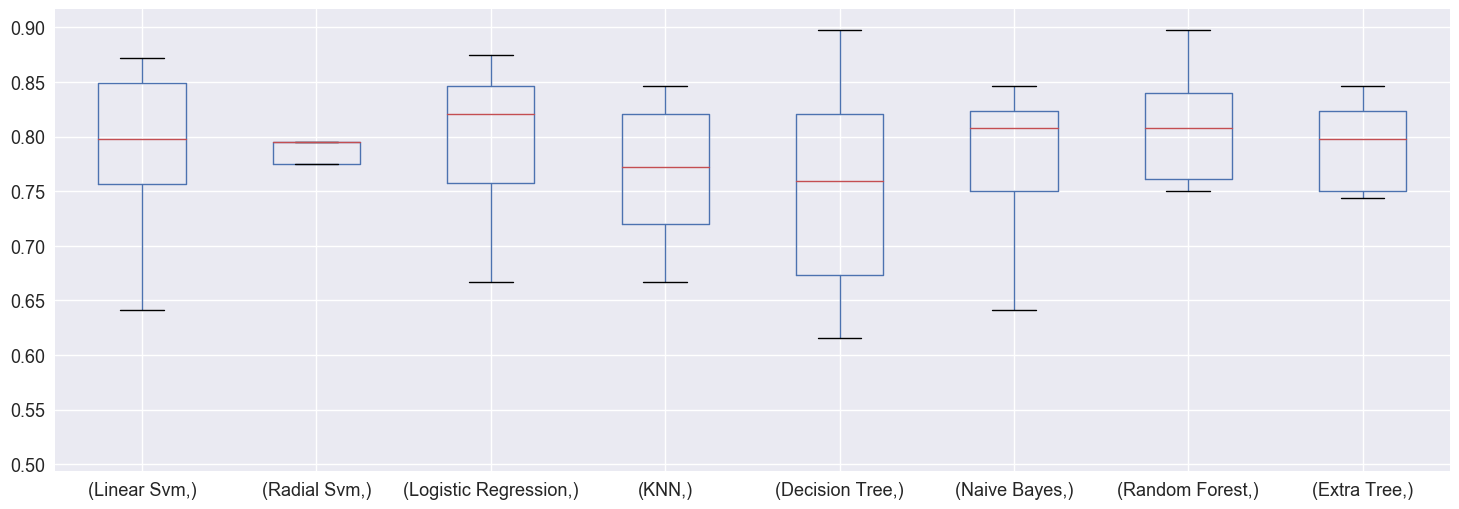

In [97]:
plt.subplots(figsize=(18,6))
box=pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot()

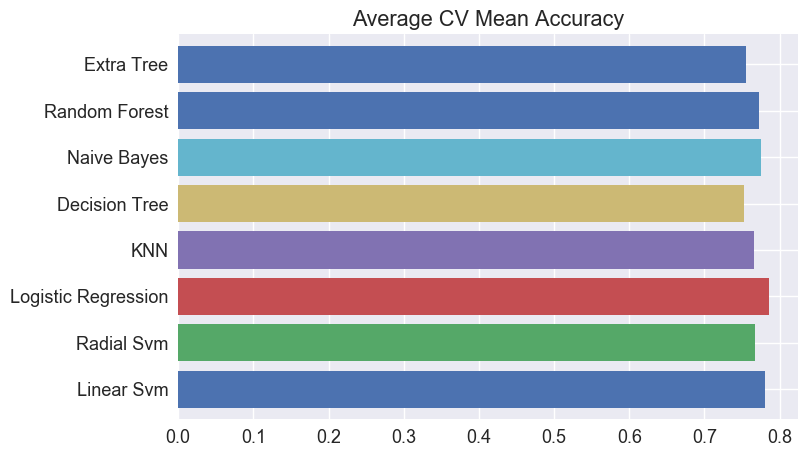

In [98]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

**Observation:** <br/>
→ Based on the plots, random forest seems a good model as it has high accuracy, stable algorithm as well as less variance (compared to the decision tree)

<a id='modeD'><a/>
## **3.D. Confusion matrix**

■  To compare the models better and to understand where they are predicting wrong, confusion matrix is the solution. 

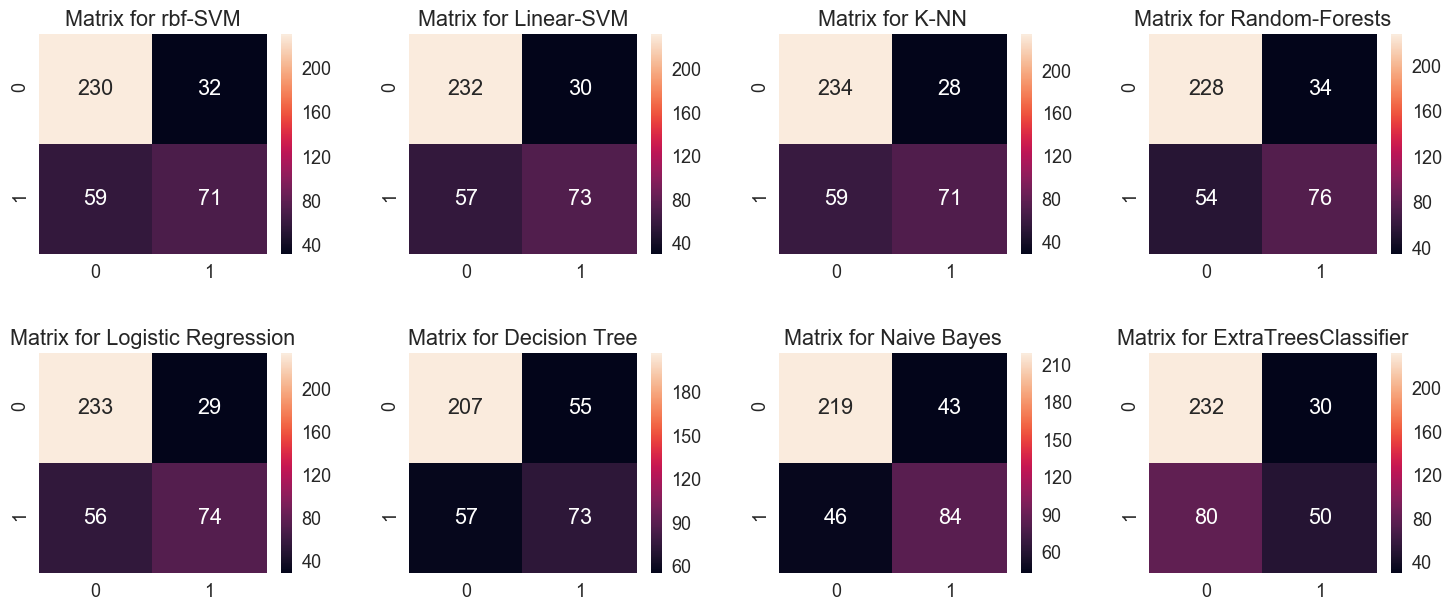

In [99]:
f,ax=plt.subplots(2,4,figsize=(18,7), gridspec_kw={'wspace': 0.3, 'hspace': 0.45})

y_pred = cross_val_predict(svm.SVC(kernel='rbf',random_state=0),X1,y1,cv=10)
sns.heatmap(confusion_matrix(y1,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')

y_pred = cross_val_predict(svm.SVC(kernel='linear',random_state=0),X1,y1,cv=10)
sns.heatmap(confusion_matrix(y1,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')

y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X1,y1,cv=10)
sns.heatmap(confusion_matrix(y1,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for K-NN')

y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100,random_state=0),X1,y1,cv=10)
sns.heatmap(confusion_matrix(y1,y_pred),ax=ax[0,3],annot=True,fmt='2.0f')
ax[0,3].set_title('Matrix for Random-Forests')

y_pred = cross_val_predict(LogisticRegression(random_state=0),X1,y1,cv=10)
sns.heatmap(confusion_matrix(y1,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Logistic Regression')

y_pred = cross_val_predict(DecisionTreeClassifier(random_state=0),X1,y1,cv=10)
sns.heatmap(confusion_matrix(y1,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Decision Tree')

y_pred = cross_val_predict(GaussianNB(),X1,y1,cv=10)
sns.heatmap(confusion_matrix(y1,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Naive Bayes')

y_pred = cross_val_predict(ExtraTreesClassifier(random_state=0),X1,y1,cv=10)
sns.heatmap(confusion_matrix(y1,y_pred),ax=ax[1,3],annot=True,fmt='2.0f')
ax[1,3].set_title('Matrix for ExtraTreesClassifier')

plt.show()

**Interpreting Confusion Matrix: ** <br/>

The upper left and lower right box shows the number of correct predictions made for each class while lower left and upper right box shows number of wrong predictions. Lets consider the plot for random forest:

→ **Correct predictions:**  
* The no. of correct predictions are 228 (for `negatif`) + 76 (`positif`) with the mean CV accuracy being (228+76)/392 ~ 77.55%.

→ **Errors:** Wrongly Classified 34 `negatif` people as `positif` and 54 `positif` people as `negatif`. 

From confusion matrix, although random forest prediction looks good, NaiveBayes has a higher chance in correctly predicting `positif` group. Also, linear SVM performed very well..



<a id='modeE'><a/>
## **3.E. Hyper-Parameters Tuning**

■ In machine learning, a hyperparameter is a parameter whose value is set before the learning process begins. By contrast, the values of other parameters are derived via training.(c-wiki) <br/>

→ After deciding which dataset to work on (pima1) and the best models we can further tune the hyperparameters of the algorithm to make a better model.

→ We will tune the hyper-parameters of SVM and RandomForests.

In [100]:
# Hyperparameter tuning_SVM
from sklearn.model_selection import GridSearchCV
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf','linear']
hyper={'kernel':kernel,'C':C,'gamma':gamma}

gd_SVC=GridSearchCV(estimator=svm.SVC(random_state=0),param_grid=hyper, cv=kfold, verbose=True)
gd_SVC.fit(X1,y1)
print(gd_SVC.best_score_)
print(gd_SVC.best_estimator_)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits
0.7908163265306123
SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)


[Parallel(n_jobs=1)]: Done 2400 out of 2400 | elapsed:   12.2s finished


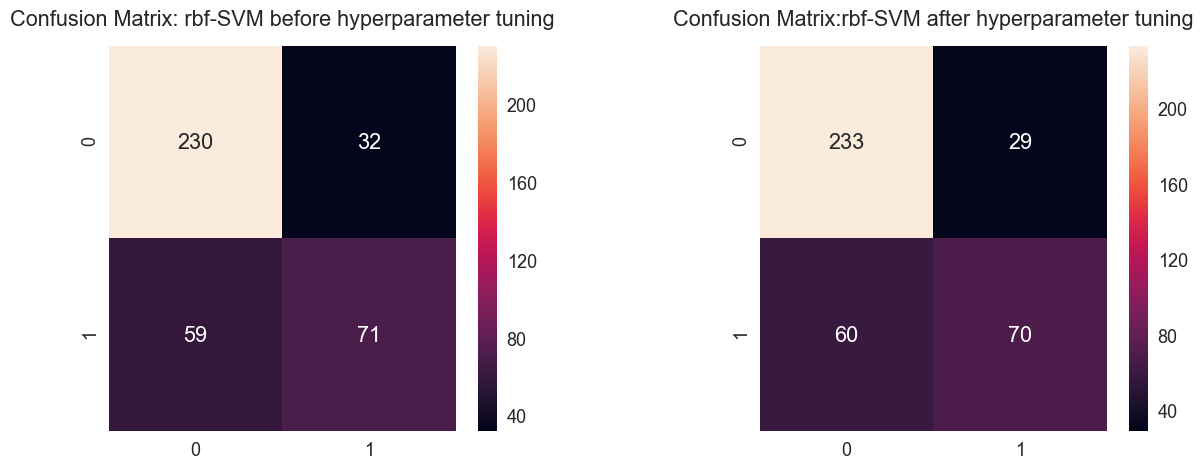

In [101]:
# comparing confusion matrix before and after hyperparameter tuning
f,ax=plt.subplots(1,2,figsize=(14,5), gridspec_kw={'wspace': 0.5, 'hspace': 0.95})

y_pred = cross_val_predict(svm.SVC(kernel='rbf',random_state=0),X1,y1,cv=10)
sns.heatmap(confusion_matrix(y1,y_pred),ax=ax[0],annot=True,fmt='2.0f')
ax[0].set_title('Confusion Matrix: rbf-SVM before hyperparameter tuning', pad=15)

y_pred = cross_val_predict(svm.SVC(C=0.3, gamma=0.1, kernel='rbf',random_state=0),X1,y1,cv=kfold)
sns.heatmap(confusion_matrix(y1,y_pred),annot=True,ax=ax[1],fmt='2.0f')
ax[1].set_title('Confusion Matrix:rbf-SVM after hyperparameter tuning', pad=15)
plt.show()

In [102]:
# Hyperparameter tuning_RFC
leaf = np.arange(1, 4)
depths = np.arange(2, 5)
splits = np.arange(6, 10)
n_estimators=range(1,50,10)
hyper={'max_depth': depths, 
       'min_samples_split': splits,
       'min_samples_leaf': leaf,
       'n_estimators':n_estimators,
       }

gd_RFC=GridSearchCV(estimator=RandomForestClassifier(random_state=0), param_grid=hyper, 
                cv=kfold, scoring="accuracy", n_jobs= 4, verbose=True)
gd_RFC.fit(X1,y1)
print(gd_RFC.best_score_)
print(gd_RFC.best_estimator_)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=4)]: Done  75 tasks      | elapsed:    3.1s


0.8112244897959183
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=8,
            min_weight_fraction_leaf=0.0, n_estimators=11, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)


[Parallel(n_jobs=4)]: Done 1800 out of 1800 | elapsed:   15.3s finished


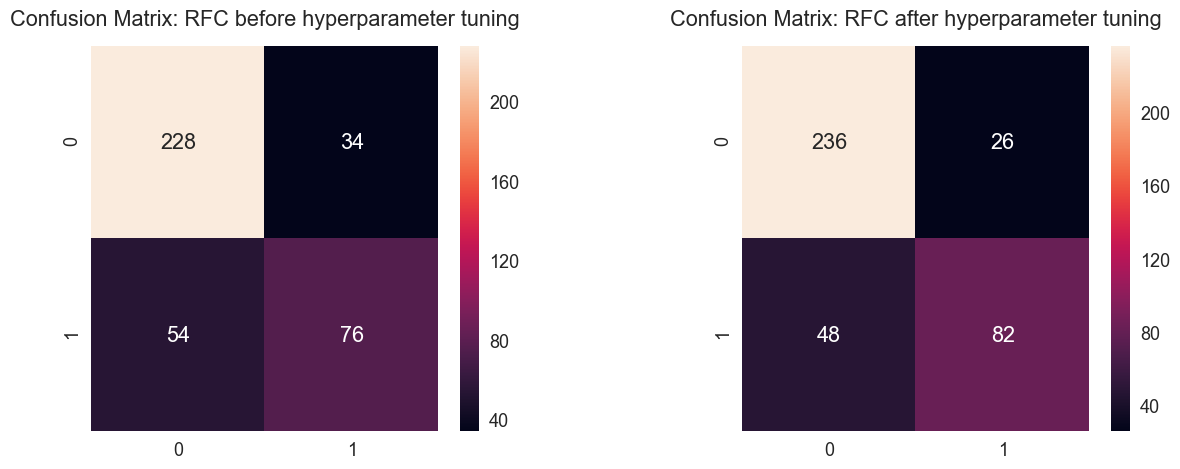

In [103]:
# comparing confusion matrix before and after hyperparameter tuning
f,ax=plt.subplots(1,2,figsize=(14,5), gridspec_kw={'wspace': 0.5, 'hspace': 0.95})

y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100,random_state=0),X1,y1,cv=10)
sns.heatmap(confusion_matrix(y1,y_pred),ax=ax[0],annot=True,fmt='2.0f')
ax[0].set_title('Confusion Matrix: RFC before hyperparameter tuning', pad=15)

y_pred = cross_val_predict(RandomForestClassifier(max_depth=4,min_samples_leaf=2, min_samples_split=8,n_estimators=11,random_state=0),X1,y1,cv=kfold)
sns.heatmap(confusion_matrix(y1,y_pred),annot=True,ax=ax[1],fmt='2.0f')
ax[1].set_title('Confusion Matrix: RFC after hyperparameter tuning', pad=15)
plt.show()

→ Although rbf-SVM did not improve a lot, RFC improved considerably.

→ Relatively, Random Forest imporved a lot from **77.5%** to **81.1%** after hyperparameter tuning. 

<a id='modeF'><a/>
## **3.F. Ensembling**

Ensemble methods use multiple learning algorithms to obtain better predictive performance than could be obtained from any of the constituent learning algorithms alone.  Combinations of multiple classifiers decrease variance, especially in the case of unstable classifiers, and may produce a more reliable classification than a single classifier.

This is another way to generalize the model further. Ensembling can be done in ways like:

1. Bagging  meta-estimator

2. Boosting

3. Voting Classifier

### 1. Bagging  meta-estimator
Bagging is a general ensemble method. It works by making random subsets of the training set and then aggregate their individual predictions to form a final prediction. Nice way to generalize the model further. Due to the averaging, there is reduction in variance. 

■ Bagging works best with models with high variance. From the boxplot we see the models with highest variance. And thus we will use Decision Tree, Logistic regression, K-NN, linear SVC, and Naive Bayes.

In [104]:
from sklearn.ensemble import BaggingClassifier

# Decision Tree
model=BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=0,n_estimators=200)
model.fit(X_train1,y_train1)
prediction=model.predict(X_test1)
print('The accuracy for bagged Decision Tree is:',metrics.accuracy_score(prediction,y_test1))
result=cross_val_score(model,X1,y1,cv=kfold,scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:',result.mean())
print ('-'*75)

# Logistic Regression
model=BaggingClassifier(base_estimator=LogisticRegression(C=0.05),random_state=0,n_estimators=1000)
model.fit(X_train1,y_train1)
prediction=model.predict(X_test1)
print('The accuracy for bagged Logistic Regression is:',metrics.accuracy_score(prediction,y_test1))
result=cross_val_score(model,X1,y1,cv=kfold,scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:',result.mean())
print ('-'*75)

# K-NN
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=9),random_state=0,n_estimators=700)
model.fit(X_train1,y_train1)
prediction=model.predict(X_test1)
print('The accuracy for bagged KNN is:',metrics.accuracy_score(prediction,y_test1))
result=cross_val_score(model,X1,y1,cv=kfold,scoring='accuracy')
print('The cross validated score for bagged KNN is:',result.mean())
print ('-'*75)

# linear SVC
model=BaggingClassifier(base_estimator=svm.SVC(kernel='linear'),random_state=0,n_estimators=100)
model.fit(X_train1,y_train1)
prediction=model.predict(X_test1)
print('The accuracy for bagged Decision Tree is:',metrics.accuracy_score(prediction,y_test1))
result=cross_val_score(model,X1,y1,cv=kfold,scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:',result.mean())
print ('-'*75)

# Naive Bayes
model=BaggingClassifier(base_estimator=GaussianNB(),random_state=0,n_estimators=1000)
model.fit(X_train1,y_train1)
prediction=model.predict(X_test1)
print('The accuracy for bagged Gaussian Naive Bayes is:',metrics.accuracy_score(prediction,y_test1))
result=cross_val_score(model,X1,y1,cv=kfold,scoring='accuracy')
print('The cross validated score for bagged Gaussian Naive Bayes is:',result.mean())

The accuracy for bagged Decision Tree is: 0.7931034482758621
The cross validated score for bagged Decision Tree is: 0.7858333333333333
---------------------------------------------------------------------------
The accuracy for bagged Logistic Regression is: 0.8045977011494253
The cross validated score for bagged Decision Tree is: 0.7829487179487179
---------------------------------------------------------------------------
The accuracy for bagged KNN is: 0.7816091954022989
The cross validated score for bagged KNN is: 0.7678205128205129
---------------------------------------------------------------------------
The accuracy for bagged Decision Tree is: 0.7816091954022989
The cross validated score for bagged Decision Tree is: 0.7829487179487179
---------------------------------------------------------------------------
The accuracy for bagged Gaussian Naive Bayes is: 0.7931034482758621
The cross validated score for bagged Gaussian Naive Bayes is: 0.7752564102564102


## 2. Boosting
Similar to bagging this also helps to reduce noise, bias and variance. In the case of Bagging, any element has the same probability to appear in a new data set. However, for Boosting the observations are weighted and therefore some of them will take part in the new sets more often. (c-https://quantdare.com/what-is-the-difference-between-bagging-and-boosting/)

In [105]:
# Adaboost tuning
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(random_state=0)
n_estimators=range(1,100,10)
learning_rate = [ 0.1, 0.2, 0.5, 1, 1.4,1.5]
ada_param_grid = { "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" : n_estimators,
              "learning_rate":  learning_rate}
gd_ada= GridSearchCV(ada, param_grid = ada_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gd_ada.fit(X1,y1)
print(gd_ada.best_estimator_)
print(gd_ada.best_score_)

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


[Parallel(n_jobs=4)]: Done  75 tasks      | elapsed:    4.0s
[Parallel(n_jobs=4)]: Done 975 tasks      | elapsed:   19.3s


AdaBoostClassifier(algorithm='SAMME', base_estimator=None, learning_rate=1.5,
          n_estimators=21, random_state=0)
0.7959183673469388


[Parallel(n_jobs=4)]: Done 1200 out of 1200 | elapsed:   23.7s finished


In [106]:
# Random Forest and SVC already done

#ExtraTrees tuning
ExtC = ExtraTreesClassifier()
leaf = np.arange(1, 6)
depths = np.arange(5, 9)
splits = np.arange(6, 12)
n_estimators=range(1,50,10)
## Search grid for optimal parameters
ex_param_grid = {"max_depth": depths,
              "min_samples_split": splits,
              "min_samples_leaf": leaf,
              "n_estimators" :n_estimators}
gd_ExtC = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gd_ExtC.fit(X1,y1)
print(gd_ExtC.best_estimator_)
print(gd_ExtC.best_score_)

Fitting 10 folds for each of 600 candidates, totalling 6000 fits


[Parallel(n_jobs=4)]: Done  85 tasks      | elapsed:    3.2s
[Parallel(n_jobs=4)]: Done 4837 tasks      | elapsed:   32.8s


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=7, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=8,
           min_weight_fraction_leaf=0.0, n_estimators=11, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
0.8010204081632653


[Parallel(n_jobs=4)]: Done 6000 out of 6000 | elapsed:   39.8s finished


In [107]:
# Gradient boosting tunning
GBC = GradientBoostingClassifier()
leaf = np.arange(2,3)
depths = np.arange(21,23)
learning_rate = [0.03, 0.04, 0.05]
## Search grid for optimal parameters
param_grid = {'loss' : ['deviance'],
              'n_estimators' : [200,300,400],
              'learning_rate': learning_rate,
              'max_depth': depths,
              'min_samples_leaf': leaf,
              'max_features': [0.5, 0.6]
              }

gd_GBC  = GridSearchCV(GBC,param_grid = param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
gd_GBC.fit(X1,y1)
print(gd_GBC .best_estimator_)
print(gd_GBC .best_score_)
#d_GBC.predict(X_test1)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   11.4s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   40.7s
[Parallel(n_jobs=4)]: Done 360 out of 360 | elapsed:  1.1min finished


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=21,
              max_features=0.6, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=2, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=300,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)
0.8035714285714286


In [108]:
# XGBoost tunning
import xgboost as xg
xgboost=xg.XGBClassifier()
depths = np.arange(1,5)
learning_rate = [0.0001, 0.001]
## Search grid for optimal parameters
param_grid = {'gamma':[0.00001, 0.0001, 0.001, 0.01],
              'n_estimators' : [300, 400, 500],
              'learning_rate': learning_rate,
              'max_depth': depths}           
gd = GridSearchCV(xgboost, param_grid = param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
gd.fit(X1,y1)
print(gd.best_estimator_)
print(gd.best_score_)

Fitting 10 folds for each of 96 candidates, totalling 960 fits


[Parallel(n_jobs=4)]: Done  51 tasks      | elapsed:    3.6s
[Parallel(n_jobs=4)]: Done 351 tasks      | elapsed:   14.1s
[Parallel(n_jobs=4)]: Done 851 tasks      | elapsed:   30.6s
[Parallel(n_jobs=4)]: Done 953 out of 960 | elapsed:   34.2s remaining:    0.2s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=1e-05, learning_rate=0.0001,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=400, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)
0.7959183673469388


[Parallel(n_jobs=4)]: Done 960 out of 960 | elapsed:   34.5s finished


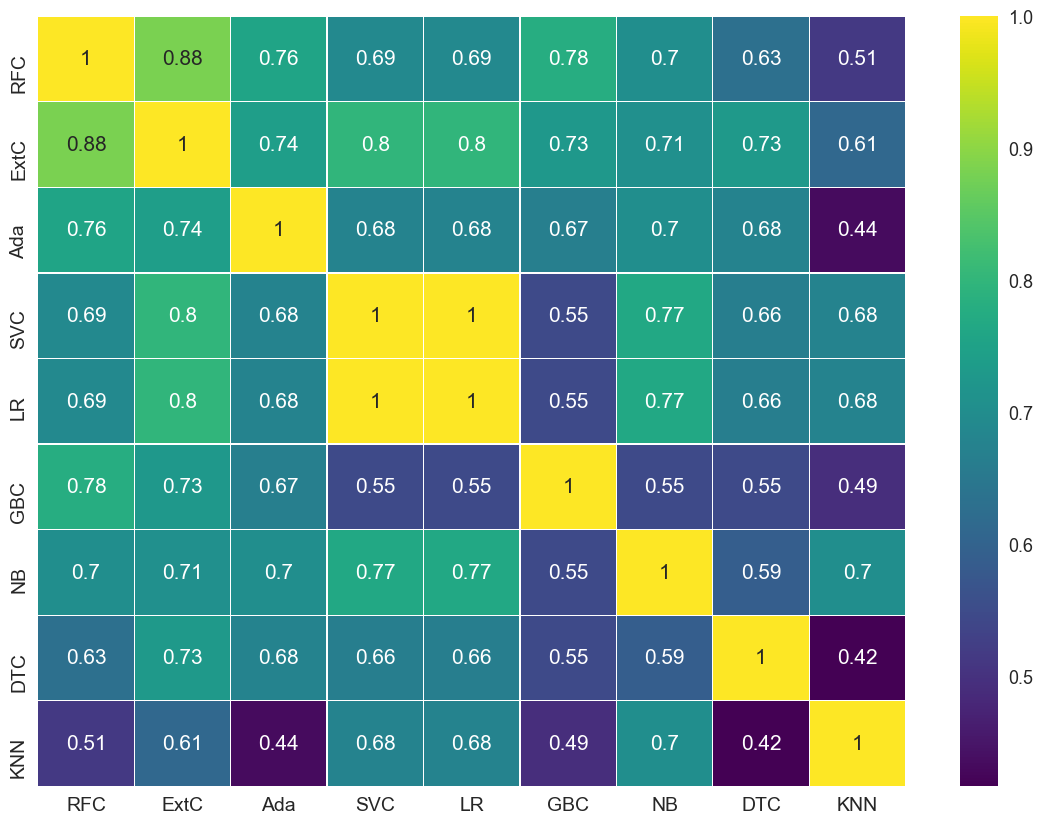

In [109]:
test_RFC = pd.Series(gd_RFC.predict(X_test1), name="RFC")
test_ExtC = pd.Series(gd_ExtC.predict(X_test1), name="ExtC")
test_SVMC = pd.Series(gd_SVC.predict(X_test1), name="SVC")
test_AdaC = pd.Series(gd_ada.predict(X_test1), name="Ada")
test_GBC = pd.Series(gd_GBC.predict(X_test1), name="GBC")
test_LR = pd.Series(logreg.predict(X_test1), name="LR")
test_NB = pd.Series(gaussian.predict(X_test1), name="NB")
test_DTC = pd.Series(decisiontree.predict(X_test1), name="DTC")
test_KNN = pd.Series(knn.predict(X_test1), name="KNN")

# Concatenate all classifier results
a = pd.concat([test_RFC, test_ExtC, test_AdaC, test_SVMC,
               test_LR,test_GBC, test_NB, test_DTC, test_KNN],axis=1)
a_new=a.replace({"negatif": 0, "positif":1})

g= sns.heatmap(a_new.corr(),annot=True,cmap='viridis',linewidths=0.2,annot_kws={'size':15})
fig=plt.gcf()
fig.set_size_inches(14,10)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

## 3. Voting Classifier

Literally like voting, here we can combine predictions from different ML models. Unlike bagging where we use same classifier, here we can use different classifier, adding to further generalization.


→ We can add classifiers that have performed well. We need to exploit advantages of both bagging and boosting. There are pros and cons of both. 
* Only Boosting determines weights for the data, whereas bagging uses  equal weighted average.
*  Only Boosting tries to reduce bias. On the other hand, Bagging may solve the over-fitting problem, while Boosting can increase it.

→ Based on correlation from above we will chose SVC, RFC, and Ext for voting.

In [128]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[
                                            ('SVC',svm.SVC(probability=True,kernel='rbf',C=0.3,gamma=0.1)),
                                            ('RFC',RandomForestClassifier(max_depth=4,min_samples_leaf=2, min_samples_split=8,n_estimators=11,random_state=0)),
                                            #('LR',LogisticRegression(C=0.05)),
                                            #('DT',DecisionTreeClassifier(random_state=0)),
                                            ('NB',GaussianNB()),
                                            #('Ada',AdaBoostClassifier(n_estimators=200,learning_rate=0.05, random_state=0)),
                                             ('Ext',ExtraTreesClassifier( max_depth=7,min_samples_leaf=2, min_samples_split=11,n_estimators=21)),
                                            #('GBC',GradientBoostingClassifier(learning_rate=0.03, max_depth=21,max_features=0.5,min_samples_leaf=2,n_estimators=300)),
                                            #('Xg',xg.XGBClassifier(gamma=1e-05, learning_rate=0.0001, n_estimators=400)),
                                             ], voting='soft').fit(X_train1,y_train1)
                      

print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(X_test1, y_test1))

cross=cross_val_score(ensemble_lin_rbf,X1,y1, cv = kfold,scoring = "accuracy", n_jobs= 4, verbose=True)
print('The cross validated score is',cross.mean())

C:\Users\gospu\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


The accuracy for ensembled model is: 0.8160919540229885
The cross validated score is 0.7907051282051282


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    2.8s finished


<a id='modeG'><a/>
## **3.G. Most important features**

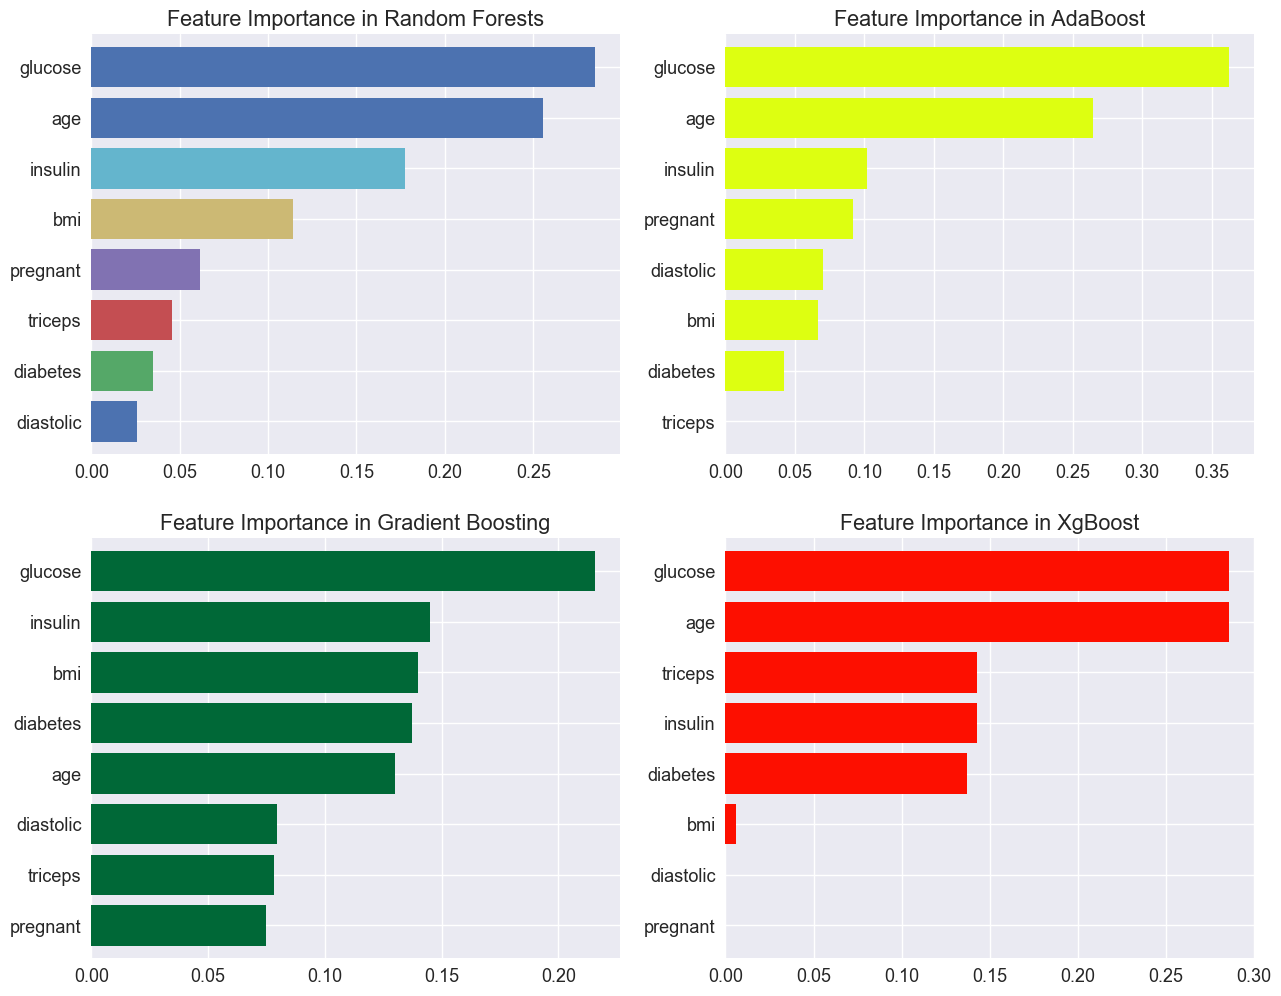

In [129]:
# Finding most important features
X1 = pima1[['age', 'pregnant', 'glucose', 'diabetes', 'insulin', 'triceps',
       'diastolic', 'bmi']]
y1 = pima1['test']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.22, random_state = 0)

f,ax=plt.subplots(2,2,figsize=(15,12))
model=RandomForestClassifier(max_depth=4,min_samples_leaf=2, min_samples_split=8,n_estimators=11,random_state=0)
model.fit(X1,y1)
pd.Series(model.feature_importances_,X1.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')

model=AdaBoostClassifier(algorithm='SAMME', base_estimator=None, learning_rate=1.5, n_estimators=21, random_state=0)
model.fit(X1,y1)
pd.Series(model.feature_importances_,X1.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')

model=GradientBoostingClassifier(learning_rate=0.03, max_depth=21,max_features=0.5,min_samples_leaf=2,n_estimators=300)
model.fit(X1,y1)
pd.Series(model.feature_importances_,X1.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')

model=xg.XGBClassifier(gamma=1e-05, learning_rate=0.0001, n_estimators=400)
model.fit(X1,y1)
pd.Series(model.feature_importances_,X1.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')
plt.show()

We can see the important features for various classifiers like **RandomForests, AdaBoost, GradientBoost, XgBoost**.

**Observations:**<br/>
→ Glucose seem to be the most important feature as expected from EDA.<br/>
→ Age feature also seem to provide insights about developing diabetes as was expected from EDA. <br/>
→ Interestingly, except gradientboost, `diabetes` or family history of diabetes doesn't seem to be an important feature. <br/>
→ `triceps` or body fat does not seem to be an important predictor of diabetes either.

■ **Acknowledgement:** 
* Vivek Rajasekharan for motivating me to dive in and explore the fantastic things that could be achieved with datascience!
* Ted Petrou, providing an exciting bootcamp that boosted my confidence and knowledge horizons!
* Several amazing DS wizards at kaggle for providing a nice framework to work with!
* Anna Wilde for giving constant supply of caffeines while I was wrangling with data!